# **CMSC320 Final Project**

### **By: Brayden Ngo**

## Table of Contents

* 1.1 Introduction
    * 1.2 Data Collection
* 2.1 Data Management/Representation
    * 2.2 Making a New Dataframe
* 3.1 Exploratory Data Analysis
    * 3.1.2 Win Rates of Teams
    * 3.1.3 Examing Relation Between Total Yards and Win Rate
    * 3.1.4 Passing Yards Relationship with Win Rate
    * 3.1.5 Rushing Yards Relationship with Win Rate
    * 3.1.6 Comparison Between Rushing and Passing Yards
    * 3.1.7 Examining Third Down Conversion Rates Effect on Win Rate
    * 3.1.8 Analysis of Turnovers Impact on NfL Games
    * 3.1.9 Is there Actually Such Thing as Home Field Advantage?
    * 3.2.1 Impact of Penalties on Games
    * 3.2.2 Time is Everything?
    * 3.2.3 Sack Masters
    * 3.2.4 Driving to the Zone
    * 3.2.5 Analysis Summary
* 4.1 Predictive Model/Hypothesis Testing
    * 4.1.1 Initial Model
    * 4.1.2 Using Random Forest
    * 4.1.3 Random Forest Additional Feature
* 5.1 Communication of Insights


## Libaries Used
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Statsmodel (Python Package)
* scikit-learn

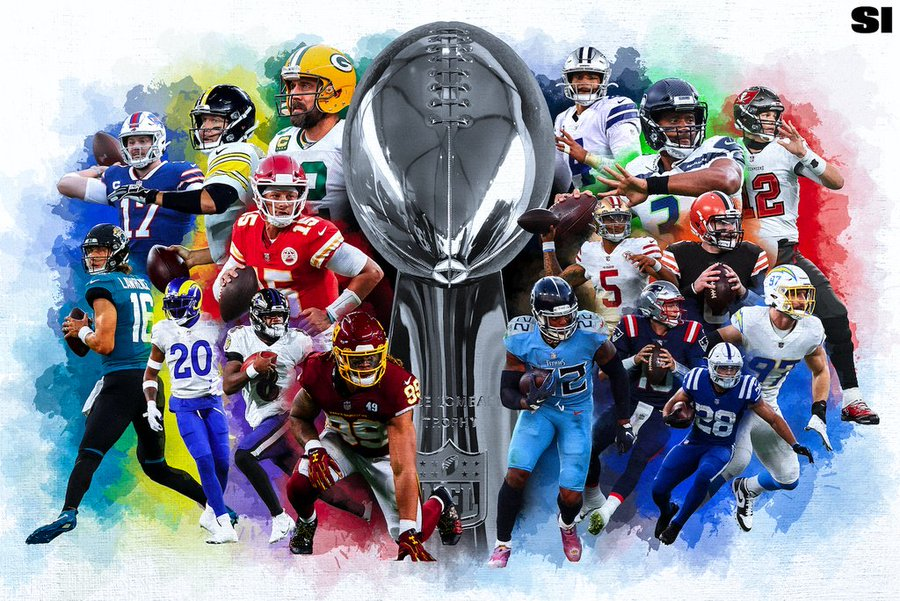

# What's In a Win: Predicting NFL Games

## 1.1: Introduction

The NFL is arguably the most popular sport in America. American football originated as a combination of soccer and rugby and was introduced at the college level in the late 1800s. By the 1920s, American football had grown in popularity to the degree where a professional league, the NFL was established. Over the years the NFL has grown tremendously in popularity as it now is estimated to be a nearly 9 billion dollar industry. In fact, the typical NFL regular season game will pull in up to 15.4 million viewers. This is significant margin compared to viewership of the other major US sports as the NBA has around 1.34 million viewers per game, the MLB has around 0.17 million, and the NHL has around 2.15 million viewers per game. As the NFL has expanded during the past decade, the use of technology has also been very prevalant. For instance, in the last few years the NFl has partenered with Amazon and its AWS software to apply machine learning algorithms to better communicate and engage with fans. For instance, AWS has been used to determine stats like passing score, 4th down decisions, expected rushing yards, and more unexpected ways. As we can see data analytics has become a more integral part of the modern NFL. However, we ourselves can get started with the basics of data analysis and getting familiar with fundamental data science concepts through the NFL. With all the different moving parts that can influence the potential of the game like passing efficiency, turnover differentials, and redzone efficiency there are potentially many different factors which can impact the outcome of an NFL game and warrant further analysis. Furthermore, we can determine if other concepts such as "home-field advantage" actually means anything in impacting the winner of an NFL game. Overall, in this following tutorial we will go through our own data science process in exploring the relationship between data and the winner of NFL games. Our hope is that this tutorial will not only give you some experience with the data science pipeline, but will help you gain insights into the NFL and maybe even use the information from here to play into what teams you bet on based on what factors impact games the most.

If you desire, here are some sources to learn more about the NFl and data analytics within the NFL:

**https://www.sportszion.com/nfl-most-popular-sport-in-america/**

**https://aws.amazon.com/sports/nfl/#:~:text=The%20NFL%20uses%20AWS%20to,for%20players%20on%20the%20field.**

## 1.2: Data Collection

The first step in our process will be to obtain a dataset for NFL games. There are data for NFL games that can be scraped from sites such as ESPN or Pro Football Focus. However, for our dataset we can use a CSV of data of NFL games that has already been scrapped and put together on Kaggle. The following link will allow you to check out the dataset more in detail if you desire:

**https://www.kaggle.com/datasets/cviaxmiwnptr/nfl-team-stats-20022019-espn**

First, we'll need to import the dataset and examine what we're working with so let's go ahead and do that first.

In [1]:
# import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

# load in our csv file into a dataframe
game_df = pd.read_csv('nfl_team_stats_2002-2021.csv')

# examine the dataframe
display(game_df)

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


date      away        home  first_downs_away  first_downs_home  \
0     2002-09-05     49ers      Giants                13                21   
1     2002-09-08      Jets       Bills                18                26   
2     2002-09-08   Vikings       Bears                19                20   
3     2002-09-08  Chargers     Bengals                27                13   
4     2002-09-08    Chiefs      Browns                24                24   
...          ...       ...         ...               ...               ...   
5352  2022-01-23      Rams  Buccaneers                24                20   
5353  2022-01-23     Bills      Chiefs                23                30   
5354  2022-01-30   Bengals      Chiefs                21                24   
5355  2022-01-30     49ers        Rams                16                25   
5356  2022-02-13      Rams     Bengals                18                15   

     third_downs_away third_downs_home fourth_downs_away fourth_downs_home  \
0                4-12             9-16               0-0               0-1   
1                 2-8             7-17               0-0               2-2   
2                5-13             7-13               0-0               0-0   
3                6-10             4-11               0-0               0-0   
4                5-11             4-11               0-0               0-0   
...               ...              ...               ...               ...   
5352             4-11             3-14               0-0               2-4   
5353             6-14             8-13               4-4               1-1   
5354             8-14             6-12               0-0               0-0   
5355              3-9            11-18               0-0               0-1   
5356             6-15             3-14               1-1               1-3   

      passing_yards_away  ...  redzone_away  redzone_home  drives_away  \
0                    166  ...           0-8           0-6           13   
1                    193  ...           0-9           0-8           17   
2                    228  ...           0-7           0-6           17   
3                    160  ...           0-7           0-5           11   
4                    276  ...          0-10          0-10           20   
...                  ...  ...           ...           ...          ...   
5352                 355  ...           2-5           2-3           15   
5353                 313  ...           3-3           3-5            9   
5354                 243  ...           1-4           3-5           10   
5355                 232  ...           1-1           2-6            9   
5356                 270  ...           3-3           1-3           13   

      drives_home  def_st_td_away def_st_td_home possession_away  \
0              15               0              0           27:32   
1              18               2              0           21:06   
2              17               0              0           31:31   
3              15               0              0           37:48   
4              17               0              0           30:16   
...           ...             ...            ...             ...   
5352           15               0              0           34:08   
5353           11               0              0           27:37   
5354           11               0              0           35:56   
5355            9               0              0           24:21   
5356           13               0              0           30:47   

     possession_home score_away  score_home  
0              32:28         16          13  
1              39:08         37          31  
2              28:29         23          27  
3              22:12         34           6  
4              29:44         40          39  
...              ...        ...         ...  
5352           25:52         30          27  
5353           36:38         36          42  
5354           29:

From the following dataset, it's clear that's a numerous amount of different columns in the dataset. Let's list out the different columns first so we can see everything that we can work with.

In [2]:
print(game_df.columns)

Index(['date', 'away', 'home', 'first_downs_away', 'first_downs_home',
       'third_downs_away', 'third_downs_home', 'fourth_downs_away',
       'fourth_downs_home', 'passing_yards_away', 'passing_yards_home',
       'rushing_yards_away', 'rushing_yards_home', 'total_yards_away',
       'total_yards_home', 'comp_att_away', 'comp_att_home', 'sacks_away',
       'sacks_home', 'rushing_attempts_away', 'rushing_attempts_home',
       'fumbles_away', 'fumbles_home', 'int_away', 'int_home',
       'turnovers_away', 'turnovers_home', 'penalties_away', 'penalties_home',
       'redzone_away', 'redzone_home', 'drives_away', 'drives_home',
       'def_st_td_away', 'def_st_td_home', 'possession_away',
       'possession_home', 'score_away', 'score_home'],
      dtype='object')


Overall, I would say the majority of the features in this dataset will be very crticial to analyzing the outcome of an NFl game. The only one that could be considered to drop is def_st_td_away and def_st_td_home since typically the number of touchdowns scored by the defense and special teams will typically be very low (especially with rule changes moving the kickoff line to make returns harder) so they probably won't impact the result of the game so we will go ahead and drop those two columns. Additionally, we'll go ahead and drop fourth down conversions since 4th downs aren't frequently gone for in games typically (usually only if teams need to try to win the game).

In [3]:
# drop the columns from the dataframe
game_df = game_df.drop('def_st_td_away', axis = 1)
game_df = game_df.drop('def_st_td_home', axis = 1)
game_df = game_df.drop('fourth_downs_away', axis = 1)
game_df = game_df.drop('fourth_downs_home', axis = 1)

The next thing that we might need to consider is separating out regular season games from playoff games. Afterall, there's a reason why commentators say the playoffs are a whole different beast. While it would be logical here to simply sort through the different dates and assign a new column to the type of game (either playoff or regular) an entry in the dataset corresponds to, the difficulty here is that the dates from season to season can differ widely. Also, with the addition of the 17th game during the 2021 NFl season, it will be very difficult to determine if games that were played in January or later are actually playoff or regular games from the season. In order to rectify this, we will use another data set that already provides the classification for each of the games and we will merge the two datasets together. Here is the Github Link to where you can find this particular data set (we will be using the Games table in particular):

**https://github.com/nflverse/nfldata/blob/master/DATASETS.md#games**

Note, in order to download the CSV I simply went to the URL that was provided on the Github repo **http://www.habitatring.com/games.csv** and directly downloaded the dataset onto my local machine.

In [4]:
# load in the second data frame and output it
games_supp_df = pd.read_csv('games.csv')
display(games_supp_df)

game_id  season game_type  week     gameday weekday gametime  \
0     1999_01_MIN_ATL    1999       REG     1  1999-09-12  Sunday      NaN   
1      1999_01_KC_CHI    1999       REG     1  1999-09-12  Sunday      NaN   
2     1999_01_PIT_CLE    1999       REG     1  1999-09-12  Sunday      NaN   
3      1999_01_OAK_GB    1999       REG     1  1999-09-12  Sunday      NaN   
4     1999_01_BUF_IND    1999       REG     1  1999-09-12  Sunday      NaN   
...               ...     ...       ...   ...         ...     ...      ...   
6404  2022_18_NYG_PHI    2022       REG    18  2023-01-08  Sunday    13:00   
6405  2022_18_CLE_PIT    2022       REG    18  2023-01-08  Sunday    13:00   
6406   2022_18_LA_SEA    2022       REG    18  2023-01-08  Sunday    13:00   
6407   2022_18_ARI_SF    2022       REG    18  2023-01-08  Sunday    13:00   
6408  2022_18_DAL_WAS    2022       REG    18  2023-01-08  Sunday    13:00   

     away_team  away_score home_team  ...  wind  away_qb_id  home_qb_id  \
0          MIN        17.0       ATL  ...   NaN  00-0003761  00-0002876   
1           KC        17.0       CHI  ...  12.0  00-0006300  00-0010560   
2          PIT        43.0       CLE  ...  12.0  00-0015700  00-0004230   
3          OAK        24.0        GB  ...  10.0  00-0005741  00-0005106   
4          BUF        14.0       IND  ...   NaN  00-0005363  00-0010346   
...        ...         ...       ...  ...   ...         ...         ...   
6404       NYG         NaN       PHI  ...   NaN         NaN         NaN   
6405       CLE         NaN       PIT  ...   NaN         NaN         NaN   
6406        LA         NaN       SEA  ...   NaN         NaN         NaN   
6407       ARI         NaN        SF  ...   NaN         NaN         NaN   
6408       DAL         NaN       WAS  ...   NaN         NaN         NaN   

            away_qb_name    home_qb_name          away_coach     home_coach  \
0     Randall Cunningham  Chris Chandler        Dennis Green     Dan Reeves   
1            Elvis Grbac  Shane Matthews  Gunther Cunningham    Dick Jauron   
2        Kordell Stewart       Ty Detmer         Bill Cowher   Chris Palmer   
3            Rich Gannon     Brett Favre          Jon Gruden     Ray Rhodes   
4            Doug Flutie  Peyton Manning       Wade Phillips       Jim Mora   
...                  ...             ...                 ...            ...   
6404                 NaN             NaN        Brian Daboll  Nick Sirianni   
6405                 NaN             NaN     Kevin Stefanski    Mike Tomlin   
6406                 NaN             NaN          Sean McVay   Pete Carroll   
6407                 NaN             NaN     Kliff Kingsbury  Kyle Shanahan   
6408                 NaN             NaN       Mike McCarthy     Ron Rivera   

            referee stadium_id                   stadium  
0      Gerry Austin      ATL00              Georgia Dome  
1      Phil Luckett      CHI98             Soldier Field  
2       Bob McElwee      CLE00  Cleveland Browns Stadium  
3     Tony Corrente      GNB00             Lambeau Field  
4          Ron Blum      IND99                  RCA Dome  
...             ...        ...                       ...  
6404            NaN      PHI00   Lincoln Financial Field  
6405            NaN      PIT00          Acrisure Stadium  
6406            NaN      SEA00               Lumen Field  
6407            NaN      SFO01            Levi's Stadium  
6408            NaN      WAS00                FedExField  

[6409 rows x 45 columns]

In [5]:
print(games_supp_df.columns)

Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium'],
      dtype='object')


Here's an explanation of some of the columns which was been directly taken from the Github page the dataset was obtained from. 
* game_id: The ID of the game as assigned by the NFL. Note that this value matches the game_id field in nflscrapR if you wish to join the data.
* alt_game_id: This is a more human-readable ID. It consists of: The season, an underscore, the two-digit week number, an underscore, the away team, an underscore, the home team.
* season: The year of the NFL season. This reperesents the whole season, so regular season games that happen in January as well as playoff games will occur in the year after this number.
* game_type: What type of game? One of the following values:
    * REG: a regular season game
    * WC: a wildcard playoff game
    * DIV: a divisional round playoff game
    * CON: a conference championship
    * `SB': a Super Bowl
* week: The week of the NFL season the game occurs in. This will be 1-17 for the regular season, 18 for wildcard playoff games, 19 for divisional playoff games, 20 for conference championships and 21 for Super Bowls.
* gameday: The date on which the game occurred.
* weekday: The day of the week on which the game occcured.
* gametime: The kickoff time of the game. This is represented in 24-hour time and the Eastern time zone, regardless of what time zone the game was being played in.
* away_team: The away team.
* away_score: The number of points the away team scored. Is NA for games which haven't yet been played.
* home_team: The home team. Note that this contains the designated home team for games which no team is playing at home such as Super Bowls or NFL International games.
* home_score: The number of points the home team scored. Is NA for games which haven't yet been played.
* location: Either Home if the home team is playing in their home stadium, or Neutral if the game is being played at a neutral location. This still shows as Home for games between the Giants and Jets even though they share the same home stadium.
* result: The number of points the home team scored minus the number of points the visiting team scored. Equals h_score - v_score. Is NA for games which haven't yet been played. Convenient for evaluating against the spread bets
* total: The sum of each team's score in the game. Equals h_score + v_score. Is NA for games which haven't yet been played. Convenient for evaluating over/under total bets.
* gsis: The id of the game issued by the NFL Game Statistics & Information System.
* pfr: The id of the game issued by Pro Football Reference
* pff: The id of the game issued by Pro Football Focus
* espn: The id of the game issued by ESPN
* spread_line: The spread line for the game. A positive number means the home team was favored by that many points, a negative number means the away team was favored by that many points. This lines up with the result column.
* total_line: The total line for the game.
* roof: What was the status of the stadium's roof? Will be one of the following values:
    * outdoors: An outdoor stadium
    * open: Stadium has a retractable roof which was open
    * closed: Stadium has a retractable roof which was closed
    * dome: An indoor stadium
* surface: What type of ground the game was played on
* temp: The temperature at the stadium (for outdoors and open only)
* wind: The speed of the wind in miles/hour (for outdoors and open only)
* away_coach: Name of the head coach of the away team
* home_coach: Name of the head coach of the home team
* referee: Name of the game's referee (head official)
* stadium: Name of the stadium

As we can see from the columns there is a lot of columns that we won't use such as gsis, the surface, referee, stadium, etc. The only columns that we will keep include the season, game_type, gameday, the away_team, the home_team, and the result. The reason is that the season is the main thing we're after so we can actually distinguish regular season games, the game_type, gameday, away_team, and home_team are needed so we can match with our first dataframe and we will use result because it's an extra numerical statistic for the game that could be useful later on in our exploratory analysis.

In [6]:
# select the columns we want to keep and store it in a new dataframe
games_supp_df = games_supp_df[['season', 'game_type', 'gameday', 'away_team', 'home_team', 'result']]
display(games_supp_df)

season game_type     gameday away_team home_team  result
0       1999       REG  1999-09-12       MIN       ATL    -3.0
1       1999       REG  1999-09-12        KC       CHI     3.0
2       1999       REG  1999-09-12       PIT       CLE   -43.0
3       1999       REG  1999-09-12       OAK        GB     4.0
4       1999       REG  1999-09-12       BUF       IND    17.0
...      ...       ...         ...       ...       ...     ...
6404    2022       REG  2023-01-08       NYG       PHI     NaN
6405    2022       REG  2023-01-08       CLE       PIT     NaN
6406    2022       REG  2023-01-08        LA       SEA     NaN
6407    2022       REG  2023-01-08       ARI        SF     NaN
6408    2022       REG  2023-01-08       DAL       WAS     NaN

[6409 rows x 6 columns]

Now we can merge together the two tables by the gameday and the away and home teams. First we will rename the columns in our new table, change the abbreviations for team names (since our second data frame is using the abbreviations instead of the full team name so we need to change it to merge with the first) and then we can proceed by using a left join.

In [7]:
# make a copy of the dataframe
games_supp_df_copy = games_supp_df.copy()
# rename the columns
games_supp_df_copy.rename(columns = {'gameday': 'date', 'away_team': 'away', 'home_team': 'home'}, inplace = True)

# create a dictionary to map the team abbreviations to the full name
team_hash = {'MIN': 'Vikings','KC': 'Chiefs','PIT': 'Steelers','OAK': 'Raiders','BUF': 'Bills','SF':'49ers','CAR':'Panthers',
             'NE': 'Patriots','ARI': 'Cardinals','DET': 'Lions','BAL': 'Ravens','NYG': 'Giants','CIN':'Bengals',
             'DAL':'Cowboys','MIA':'Dolphins','NYJ': 'Jets','JAX':'Jaguars','SEA':'Seahawks','SD': 'Chargers', 'GB': 'Packers',
             'DEN':'Broncos','IND':'Colts', 'WAS': 'Washington', 'TB':'Buccaneers', 'NO':'Saints','CLE':'Browns',
             'ATL':'Falcons', 'PHI':'Eagles', 'TEN':'Titans', 'CHI':'Bears','STL':'Rams','HOU':'Texans', 'LA':'Rams', 'LAC':'Chargers',
             'LV': 'Raiders'}

# go through the data frame and change the name to the full name
for index, row in games_supp_df_copy.iterrows():
    games_supp_df_copy.at[index, 'home'] = team_hash[games_supp_df_copy.at[index, 'home']]
    games_supp_df_copy.at[index, 'away'] = team_hash[games_supp_df_copy.at[index, 'away']]

display(games_supp_df_copy)

season game_type        date       away        home  result
0       1999       REG  1999-09-12    Vikings     Falcons    -3.0
1       1999       REG  1999-09-12     Chiefs       Bears     3.0
2       1999       REG  1999-09-12   Steelers      Browns   -43.0
3       1999       REG  1999-09-12    Raiders     Packers     4.0
4       1999       REG  1999-09-12      Bills       Colts    17.0
...      ...       ...         ...        ...         ...     ...
6404    2022       REG  2023-01-08     Giants      Eagles     NaN
6405    2022       REG  2023-01-08     Browns    Steelers     NaN
6406    2022       REG  2023-01-08       Rams    Seahawks     NaN
6407    2022       REG  2023-01-08  Cardinals       49ers     NaN
6408    2022       REG  2023-01-08    Cowboys  Washington     NaN

[6409 rows x 6 columns]

In [8]:
# merge the two data frames using the date of the game, the away team, and the home team
game_df = game_df.merge(games_supp_df_copy, on=['date', 'away', 'home'], how='left')
display(game_df)

date      away        home  first_downs_away  first_downs_home  \
0     2002-09-05     49ers      Giants                13                21   
1     2002-09-08      Jets       Bills                18                26   
2     2002-09-08   Vikings       Bears                19                20   
3     2002-09-08  Chargers     Bengals                27                13   
4     2002-09-08    Chiefs      Browns                24                24   
...          ...       ...         ...               ...               ...   
5352  2022-01-23      Rams  Buccaneers                24                20   
5353  2022-01-23     Bills      Chiefs                23                30   
5354  2022-01-30   Bengals      Chiefs                21                24   
5355  2022-01-30     49ers        Rams                16                25   
5356  2022-02-13      Rams     Bengals                18                15   

     third_downs_away third_downs_home  passing_yards_away  \
0                4-12             9-16                 166   
1                 2-8             7-17                 193   
2                5-13             7-13                 228   
3                6-10             4-11                 160   
4                5-11             4-11                 276   
...               ...              ...                 ...   
5352             4-11             3-14                 355   
5353             6-14             8-13                 313   
5354             8-14             6-12                 243   
5355              3-9            11-18                 232   
5356             6-15             3-14                 270   

      passing_yards_home  rushing_yards_away  ...  redzone_home  drives_away  \
0                    318                 113  ...           0-6           13   
1                    242                  73  ...           0-8           17   
2                    288                 140  ...           0-6           17   
3                    167                 241  ...           0-5           11   
4                    352                 194  ...          0-10           20   
...                  ...                 ...  ...           ...          ...   
5352                 308                  73  ...           2-3           15   
5353                 370                 109  ...           3-5            9   
5354                 236                 116  ...           3-5           10   
5355                 326                  50  ...           2-6            9   
5356                 226                  43  ...           1-3           13   

      drives_home possession_away possession_home score_away score_home  \
0              15           27:32           32:28         16         13   
1              18           21:06           39:08         37         31   
2              17           31:31           28:29         23         27   
3              15           37:48           22:12         34          6   
4              17           30:16           29:44         40         39   
...           ...             ...             ...        ...        ...   
5352           15           34:08           25:52         30         27   
5353           11           27:37           36:38         36         42   
5354           11           35:56           29:42         27         24   
5355            9           24:21           35:39         17         20   
5356           13           30:47           29:13         23         20   

      season  game_type  result  
0       2002        REG    -3.0  
1       2002        REG    -6.0  
2       2002        REG     4.0  
3       2002        REG   -28.0  
4       2002        REG    -1.0  
...      ...        ...     ...  
5352    2021        DIV    -3.0  
5353    2021        DIV     6.0  
5354    2021        CON    -3.0  
5355    2021        CON     3.0  
5356    2021         SB    -3.0  

[5357 rows x 38 columns]

Perfect! Now, that we've combined the two tables we've collected all of our data so we can move on to more precisely cleaning up the data and making any adjustments that we will need to do before plotting anything in later steps. 

## 2.1 Data Management/Representation

The next step in our pipeline will be to deal with data management. Essentially, we'll clean up the data and do any other manipulations to make the data easier to work with later on in our exploratory data analysis section. The first thing we will do is to drop all the row that aren't regular season games (i.e. this means dropping any rows whose game_type value isn't 'REG')

In [9]:
game_df = game_df[game_df['game_type'] == 'REG']


The next thing we need to do is to calculate new columns for our data frame. For example, one thing that will be helpful is to calculate the average winning percentage by team. Another thing we will want to consider is to add a new column so we can more easily tell who is the winner of the game instead of having to compare the scores for the home and away team every single time we examine an entry. Additionally, the format for columns such as third_down_away and third_downs_home are in a format of a string like '4-11' and this won't be useable for numerical analysis so we'll need to address this. Additionally, we will drop games that were tied since we can't determine a winner. Other things we'll add is a column separating the current format of penalities like '5-29' into 5 for the number of penalities and 29 for the yardage, and overall turning any columns in the format of a string like '5-23' into a ratio or other format so we can actually perform numerical anaylsis later.

In [10]:
# drops all games that ended in a tie
game_df = game_df[~(game_df['score_away'] == game_df['score_home'])]

# create a column to mark if home team won or not
game_df['home_team_winner'] = np.nan

# create a column for penalty count for home team
game_df['penalty_cnt_home'] = np.nan

# create a column for penalty yards for home team
game_df['penalty_yards_home'] = np.nan

# create a column for penalty count for away team
game_df['penalty_cnt_away'] = np.nan

# create a column for penalty yards for away team
game_df['penalty_yards_away'] = np.nan

# create a column for redzone trips in game for home team
game_df['redzone_visits_home'] = np.nan

# create a column for redzone ratio for home team
game_df['redzone_ratio_home'] = np.nan

# create a column for redzone trips in game for away team
game_df['redzone_visits_away'] = np.nan

# create a column for redzone ratio for away team
game_df['redzone_ratio_away'] = np.nan

# create a column for third down ratio for away team
game_df['third_down_ratio_home'] = np.nan

# create a column for third down ratio in game for home team
game_df['third_down_ratio_away'] = np.nan

# create a new column for the winner
game_df['Winner'] = np.nan

# create columns for the numerical ratio of completion attempt percentage for the home and away team
game_df['comp_att_away_ratio'] = np.nan
game_df['comp_att_home_ratio'] = np.nan

# create columns for the number of sacks taken by the home and away team
game_df['sacks_home_cnt'] = np.nan
game_df['sacks_away_cnt'] = np.nan

# assign winners for each row
for index, row in game_df.iterrows():
    # extract the number of penalties and penalty yards separately for the home team
    game_df.loc[index, 'penalty_cnt_home'] = int(row.penalties_home[0:row.penalties_home.index('-')])
    game_df.loc[index,'penalty_yards_home'] = int(row.penalties_home[row.penalties_home.index('-') + 1:])

    # extract the number of penalties and penalty yards separately for the away team
    game_df.loc[index,'penalty_cnt_away'] = int(row.penalties_away[0:row.penalties_away.index('-')])
    game_df.loc[index,'penalty_yards_away'] = int(row.penalties_away[row.penalties_away.index('-') + 1:])
    
    # fixing the times by removing the ':'
    game_df.at[index, 'possession_away'] =  game_df.at[index, 'possession_away'].replace(':', '')
    game_df.at[index, 'possession_home'] = game_df.at[index, 'possession_home'].replace(':', '')
    
    # extract the sack count for the home and the away teams
    game_df.at[index, 'sacks_home_cnt'] =  int(row.sacks_home[0:row.sacks_home.index('-')])
    game_df.at[index, 'sacks_away_cnt'] = int(row.sacks_away[0:row.sacks_away.index('-')])
    
    # completion attempts in terms of percentage for the home and the away team
    game_df.at[index, 'comp_att_away_ratio']  = int(row.comp_att_away[0:row.comp_att_away.index('-')]) / int(row.comp_att_away[row.comp_att_away.index('-') + 1:])
    game_df.at[index, 'comp_att_home_ratio']   = int(row.comp_att_home[0:row.comp_att_home.index('-')]) / int(row.comp_att_home[row.comp_att_home.index('-') + 1:])

    
    # assign the 'Winner' column the string 'Away' or 'Home' depending on which team won the game
    if(row.score_away > row.score_home):
        game_df.loc[index, 'Winner'] = 'Away'
        game_df.loc[index, 'home_team_winner'] = False
    else:
        game_df.loc[index, 'Winner'] = 'Home'
        game_df.loc[index, 'home_team_winner'] = True
        
        
    # assign the number of redzone visits and third down conversion percentage for home team
    game_df.loc[index, 'redzone_visits_home'] = int(row.redzone_home[row.redzone_home.index('-') + 1:])
    game_df.loc[index, 'third_down_ratio_home'] = int(row.third_downs_home[0:row.third_downs_home.index('-')]) / int(row.third_downs_home[row.third_downs_home.index('-') + 1:])
    
    # make sure the redzone denominator isn't 0 for the home team so we don't get an error
    if int(row.redzone_home[row.redzone_home.index('-') + 1:]) != 0:
            game_df.loc[index, 'redzone_ratio_home'] = int(row.redzone_home[0:row.redzone_home.index('-')]) / int(row.redzone_home[row.redzone_home.index('-') + 1:])
    else:
            game_df.loc[index, 'redzone_ratio_home'] = 0
            
    
    # assign the number of redzone visits and third down conversion percentage for the away team
    game_df.loc[index, 'redzone_visits_away'] = int(row.redzone_away[row.redzone_away.index('-') + 1:])
    game_df.loc[index, 'third_down_ratio_away'] = int(row.third_downs_away[0:row.third_downs_away.index('-')]) / int(row.third_downs_away[row.third_downs_away.index('-') + 1:])
    
    # make sure the redzone denominator isn't 0  for the away team so we don't get an error
    if int(row.redzone_away[row.redzone_away.index('-') + 1:]) != 0:
            game_df.loc[index, 'redzone_ratio_away'] = int(row.redzone_away[0:row.redzone_away.index('-')]) / int(row.redzone_away[row.redzone_away.index('-') + 1:])
    else:
            game_df.loc[index, 'redzone_ratio_away'] = 0

# convert the strings of time to integers so we can do numerical analysis later
game_df.possession_away = pd.to_numeric(game_df.possession_away, errors='coerce')
game_df.possession_home = pd.to_numeric(game_df.possession_home, errors='coerce')

# output the last 5 rows of the updated dataframe
display(game_df.tail(5))


date      away        home  first_downs_away  first_downs_home  \
5339  2022-01-09     49ers        Rams                23                19   
5340  2022-01-09  Patriots    Dolphins                21                23   
5341  2022-01-09  Seahawks   Cardinals                19                20   
5342  2022-01-09  Panthers  Buccaneers                18                21   
5343  2022-01-09  Chargers     Raiders                27                24   

     third_downs_away third_downs_home  passing_yards_away  \
5339             9-14            10-17                 314   
5340             5-10             7-15                 245   
5341             8-12             9-18                 229   
5342             4-14             4-11                 207   
5343             4-18             8-17                 355   

      passing_yards_home  rushing_yards_away  ...  redzone_ratio_home  \
5339                 201                 135  ...            0.750000   
5340                 103                 134  ...            0.666667   
5341                 187                 202  ...            0.333333   
5342                 324                 110  ...            1.000000   
5343                 172                  85  ...            0.600000   

      redzone_visits_away  redzone_ratio_away third_down_ratio_home  \
5339                  4.0            0.500000              0.588235   
5340                  4.0            0.750000              0.466667   
5341                  3.0            0.666667              0.500000   
5342                  4.0            0.500000              0.363636   
5343                  4.0            1.000000              0.470588   

     third_down_ratio_away Winner comp_att_away_ratio  comp_att_home_ratio  \
5339              0.642857   Away            0.727273             0.656250   
5340              0.500000   Home            0.666667             0.681818   
5341              0.666667   Away            0.576923             0.717949   
5342              0.285714   Home            0.674419             0.743590   
5343              0.222222   Home            0.531250             0.567568   

      sacks_home_cnt  sacks_away_cnt  
5339             5.0             3.0  
5340             1.0             2.0  
5341             5.0             1.0  
5342             1.0             2.0  
5343             3.0             3.0  

[5 rows x 54 columns]

## 2.2. Making a New Dataframe

The next thing we will do is to make a new dataframe which will be based on individual stats for the 32 different NFL teams (e.g. for each team they will have an average passing yards column which is how many yards they average across all the games they've played). We're making this dataframe so that we have another dataframe that we can perform numerical analysis on later on in our exploratory section.

In [11]:
# create a new empty dataframe
team_df = pd.DataFrame()

# get the list of teams
teams = game_df['away'].unique()
team_df['teams'] = teams

# create list for the wins for each team
team_win_lst = []
# create list for third down conversion
third_down_rate_lst = []
# create list for passing yards
passing_yards_lst = []
# create list for rushing yards
rushing_yards_lst = []
# create list for total yards
total_yards_lst = []
# create list for completion percentage
comp_percentage_lst = []
# create list for sacks
sacks_lst = []
# create list for rushing attempts
rushing_attempts_lst = []
# create list for fumbles
fumbles_lst = []
# create list for interceptions
interceptions_lst = []
# create list for # of penalties
penalties_lst = []
# create list for yards by penalties
penalty_yards_lst = []
# create list for number of drives
drives_lst = []
# create list for redzone trips
redzone_trips_lst = []
# create list for redzones ratio (touchdowns made out of tripe)
redzone_ratio_lst = []
# create list for turnover total
turnovers_lst = []

# create list for avg time of possession
time_lst = []

# iterate through all the teams
for team in teams:
    # create variables to store total for each field
    wins = 0
    third_downs_attempted = 0
    third_downs_made = 0
    passing_yards = 0
    rushing_yards = 0
    total_yards = 0
    completions_made = 0
    completions_attempted = 0
    sacks = 0
    rushing_attempts = 0
    fumbles = 0
    interceptions = 0
    penalties = 0
    penalty_yards = 0
    drives = 0
    redzone_trips = 0
    redzone_made = 0
    turnovers = 0
    time = 0
    
    # create a temporary dataframe that contains only rows where the curr team we're iterating played in (e.g. it's either the away or the home team)
    temp_df = game_df[(game_df['away'] == team) | (game_df['home'] == team)]
    for index, row in temp_df.iterrows():
        # add to wins for the team
        if row.away == team and row.score_away > row.score_home:
            wins += 1
        elif row.home == team and row.score_home > row.score_away:
            wins += 1
        
        # assign the corresponding values for each field depending if the team was the away or the home team
        if row.away == team:
            third_downs_made += int(row.third_downs_away[0:row.third_downs_away.index('-')])
            third_downs_attempted += int(row.third_downs_away[row.third_downs_away.index('-') + 1:])
            passing_yards += row.passing_yards_away
            rushing_yards += row.rushing_yards_away
            total_yards += row.total_yards_away
            completions_made += int(row.comp_att_away[0:row.comp_att_away.index('-')])
            completions_attempted += int(row.comp_att_away[row.comp_att_away.index('-') + 1:])
            sacks += int(row.sacks_away[0:row.sacks_away.index('-')])
            rushing_attempts += row.rushing_attempts_away
            fumbles += row.fumbles_away
            interceptions += row.int_away
            penalties += int(row.penalties_away[0:row.penalties_away.index('-')])
            penalty_yards += int(row.penalties_away[row.penalties_away.index('-') + 1:])
            drives += row.drives_away
            redzone_made += int(row.redzone_away[0:row.redzone_away.index('-')])
            redzone_trips += int(row.redzone_away[row.redzone_away.index('-') + 1:])
            turnovers += row.turnovers_away
            time += row.possession_away
        else:
            third_downs_made += int(row.third_downs_home[0:row.third_downs_home.index('-')])
            third_downs_attempted += int(row.third_downs_home[row.third_downs_home.index('-') + 1:])
            passing_yards += row.passing_yards_home
            rushing_yards += row.rushing_yards_home
            total_yards += row.total_yards_home
            completions_made += int(row.comp_att_home[0:row.comp_att_home.index('-')])
            completions_attempted += int(row.comp_att_home[row.comp_att_home.index('-') + 1:])
            sacks += int(row.sacks_home[0:row.sacks_home.index('-')])
            rushing_attempts += row.rushing_attempts_home
            fumbles += row.fumbles_home
            interceptions += row.int_home
            penalties += int(row.penalties_home[0:row.penalties_home.index('-')])
            penalty_yards += int(row.penalties_home[row.penalties_home.index('-') + 1:])
            drives += row.drives_home
            redzone_made += int(row.redzone_home[0:row.redzone_home.index('-')])
            redzone_trips += int(row.redzone_home[row.redzone_home.index('-') + 1:])
            turnovers += row.turnovers_home
            time += row.possession_home
    
    # calculate averages for all the different fields by dividing by the length or number of rows in the temp_df
    team_win_lst.append(wins / len(temp_df))
    third_down_rate_lst.append(third_downs_made / third_downs_attempted)
    passing_yards_lst.append(passing_yards / len(temp_df))
    rushing_yards_lst.append(rushing_yards / len(temp_df))
    total_yards_lst.append(total_yards / len(temp_df))
    comp_percentage_lst.append(completions_made / completions_attempted)
    sacks_lst.append(sacks/ len(temp_df))
    rushing_attempts_lst.append(rushing_attempts / len(temp_df))
    fumbles_lst.append(fumbles / len(temp_df))
    interceptions_lst.append(interceptions / len(temp_df))
    penalties_lst.append(penalties / len(temp_df))
    penalty_yards_lst.append(penalty_yards / len(temp_df))
    drives_lst.append(drives / len(temp_df))
    redzone_trips_lst.append(redzone_trips / len(temp_df))
    redzone_ratio_lst.append(redzone_made / redzone_trips)
    turnovers_lst.append(turnovers / len(temp_df))
    time_lst.append(time / len(temp_df))

# assign the lists to the corresponding column in our new dataframe
team_df['win_rate'] = team_win_lst
team_df['third_down_rate'] = third_down_rate_lst
team_df['passing_yards_avg'] = passing_yards_lst
team_df['rushing_yards_avg'] = rushing_yards_lst
team_df['total_yards_avg'] = total_yards_lst
team_df['comp_percentage'] = comp_percentage_lst
team_df['sack_avg'] = sacks_lst
team_df['rushing_attempts_avg'] = rushing_attempts_lst 
team_df['fumbles_avg'] = fumbles_lst
team_df['interceptions_avg'] = interceptions_lst
team_df['penalties_avg'] = penalties_lst
team_df['penalties_yards_avg'] = penalty_yards_lst
team_df['drives_avg'] = drives_lst
team_df['redzone_trips_avg'] = redzone_trips_lst
team_df['redzone_ratio'] = redzone_ratio_lst
team_df['turnover_avg'] = turnovers_lst
team_df['possession_avg'] = time_lst

# output the first 10 rows of the newly constructed dataframe
display(team_df.head(10))


teams  win_rate  third_down_rate  passing_yards_avg  rushing_yards_avg  \
0      49ers  0.456250         0.362110         202.721875         119.950000   
1       Jets  0.420561         0.376327         195.956386         115.791277   
2    Vikings  0.514107         0.393597         217.711599         127.087774   
3   Chargers  0.535826         0.427191         246.274143         112.710280   
4     Chiefs  0.557632         0.399613         229.068536         124.146417   
5    Falcons  0.510972         0.418109         233.181818         116.188088   
6     Eagles  0.567398         0.399583         238.012539         123.235110   
7      Lions  0.347962         0.369529         234.536050          92.808777   
8  Cardinals  0.457680         0.369627         228.012539          97.526646   
9     Ravens  0.582555         0.392490         205.573209         128.669782   

   total_yards_avg  comp_percentage  sack_avg  rushing_attempts_avg  \
0       322.671875         0.604096  2.653125             27.618750   
1       311.747664         0.596262  2.467290             28.127726   
2       344.799373         0.640479  2.507837             27.934169   
3       358.984424         0.640965  1.928349             27.352025   
4       353.214953         0.626895  2.190031             27.697819   
5       349.369906         0.628650  2.235110             27.222571   
6       361.247649         0.608857  2.435737             27.159875   
7       327.344828         0.604919  2.363636             23.595611   
8       325.539185         0.601331  2.489028             25.028213   
9       334.242991         0.609504  2.168224             29.875389   

   fumbles_avg  interceptions_avg  penalties_avg  penalties_yards_avg  \
0     0.706250           0.875000       6.471875            53.637500   
1     0.588785           1.056075       5.856698            49.233645   
2     0.667712           0.855799       6.385580            53.257053   
3     0.566978           0.884735       6.336449            51.853583   
4     0.582555           0.738318       6.221184            51.423676   
5     0.579937           0.849530       5.796238            50.360502   
6     0.749216           0.858934       6.648903            55.103448   
7     0.595611           1.078370       6.714734            55.689655   
8     0.692790           1.112853       6.771160            54.768025   
9     0.651090           0.878505       6.819315            57.302181   

   drives_avg  redzone_trips_avg  redzone_ratio  turnover_avg  possession_avg  
0   12.487500           3.303125       0.356670      1.581250     2970.462500  
1   12.267913           3.090343       0.348790      1.644860     2986.074766  
2   12.275862           3.470219       0.373984      1.523511     3009.294671  
3   11.825545           3.757009       0.407131      1.451713     3081.339564  
4   12.065421           3.520249       0.377876      1.320872     3005.816199  
5   11.871473           3.536050       0.383865      1.429467     3018.924765  
6   12.460815           3.510972       0.405357      1.608150     2968.194357  
7   12.257053           3.112853       0.399799      1.673981     2918.880878  
8   12.614420           3.316614       0.403592      1.805643     2955.398119  
9   12.520249           3.414330       0.388686      1.529595     3088.149533

Now that we have our new dataframe with different statistics according to each team, we can begin to plot our data and start performing an exploratory analysis. 

## 3.1: Exploratory Data Analysis
In this section we will perform our exploratory data analysis where we will create some plots using our dataset and the dataframes we've created from it to see what insights we can gain about NFL games. Before we continue, I will mention that we will be using matplotlib and seaborn as our libraries for creating plots. If you want to read a little more about these data science tools before continuing on feel free to do so by visiting the following links for the documentation:
* **https://matplotlib.org/**
* **https://seaborn.pydata.org/**


## 3.1.2 Win Rates of Teams

The first thing we'll do before going into a deeper analysis into games is simply to graph which teams have the best win rates. 

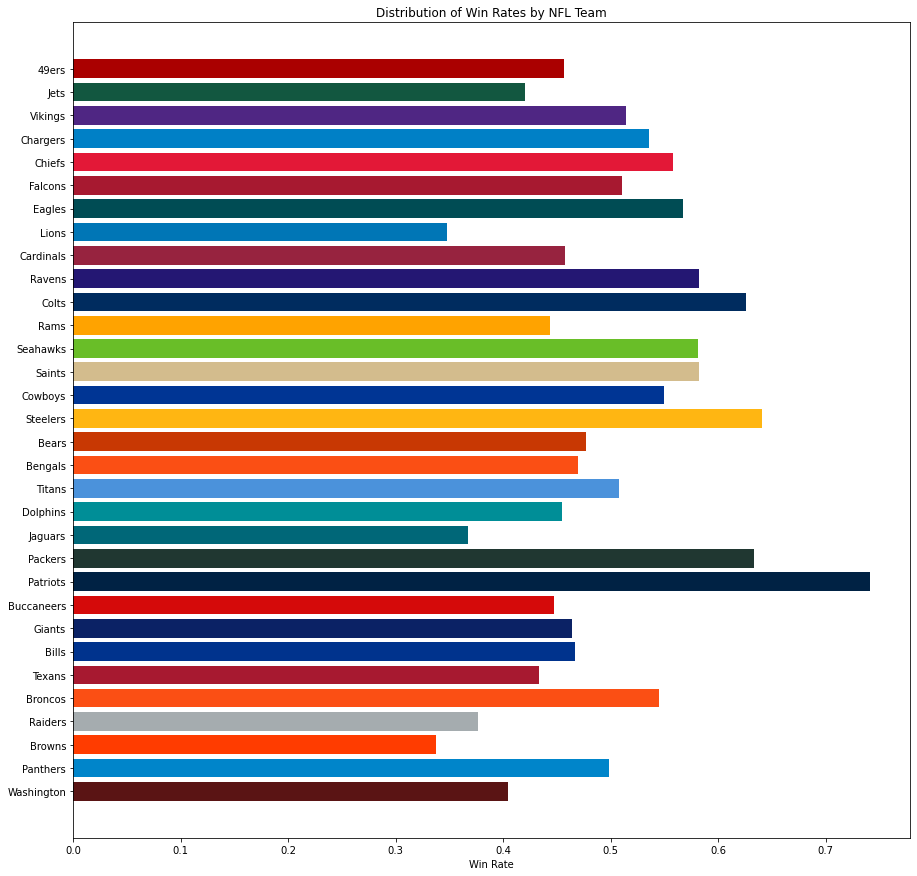

In [12]:
# create plot instance
fig, ax = plt.subplots(figsize = (15,15))

# create a tuple for the teams
teams = tuple(team_df['teams'])

# store number of teams
y_pos = np.arange(len(teams))

# store the win rates for each team in a series
win_rates = team_df['win_rate']

# create a list of hex digits which corresponds to the color used for each team
colors = ['#AA0000', '#125740', '#4F2683', '#0080C6', '#E31837', '#A71930', '#004C54', '#0076B6', '#97233F', '#241773', '#002C5F',
         '#FFA300', '#69BE28', '#D3BC8D', '#003594', '#FFB612', '#C83803', '#FB4F14', '#4B92DB', '#008E97', '#006778', '#203731',
         '#002244', '#D50A0A', '#0B2265', '#00338D', '#A71930', '#FB4F14','#A5ACAF', '#FF3C00', '#0085CA', '#5A1414']

# create the horizontal bar plot
ax.barh(y_pos, win_rates, align='center', color = colors )
ax.set_yticks(y_pos, labels=teams)
ax.invert_yaxis()  # labels read top-to-bottom
# add labeling to the plot
ax.set_xlabel('Win Rate')
ax.set_title('Distribution of Win Rates by NFL Team')

plt.show()

From the horizontal bar graph above, we can see that some of the most successful teams in terms of win rate include the Patriots (who have over a 70 percent win rate), the Steelers, Packers, Colts, Ravens, Seahawks, and Saints. Some of the lowest winning teams include the Lions, Browns, Jaguars, and the Raiders. Now that we've taken a look at the win rates, let's start analyzing the impact of different factors on the games and teams' winrate. 

First, let's take a look at the relationship between the total yards average in a game compared to the win rate of a team. We can do this simply by using a scatter plot. We'll also add a regression line just so we can take a look at the relationship better.

## 3.1.3 Examining Relation Between Total Yards and Win Rate

Text(0.5, 1.0, 'Average Win Rate vs. Average Total Yards by NFL Team')

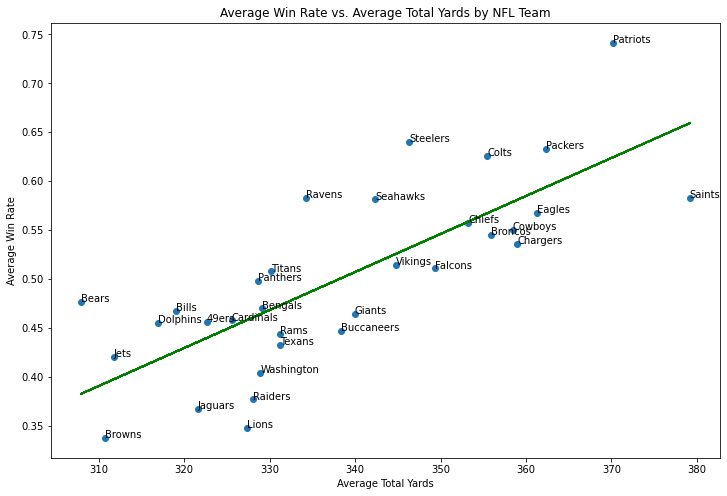

In [13]:
# instantiate the plot
plt.figure(figsize = (12, 8))
# create the scatter plot
plt.scatter(team_df['total_yards_avg'], team_df['win_rate'])


# create list for labels
team_labels = list(team_df['teams'])
avg_total_yards = list(team_df['total_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

# iterate through the team labels and add the label for the points
for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (avg_total_yards[index], avg_win_rate[index]))
    x = np.array(avg_total_yards)
    y = np.array(avg_win_rate)
    
    # create the regression line
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

    
# add labels for the axes and the title
plt.xlabel("Average Total Yards")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Average Total Yards by NFL Team')

From the graph above it's clear that the more yards accumulated the higher the win rate. Let's see if we can get a better deeper breakdown between rushing yards and passing yards on wins.

## 3.1.4 Passing Yards Relationship with Win Rate

Text(0.5, 1.0, 'Average Win Rate vs. Average Passing Yards by NFL Team')

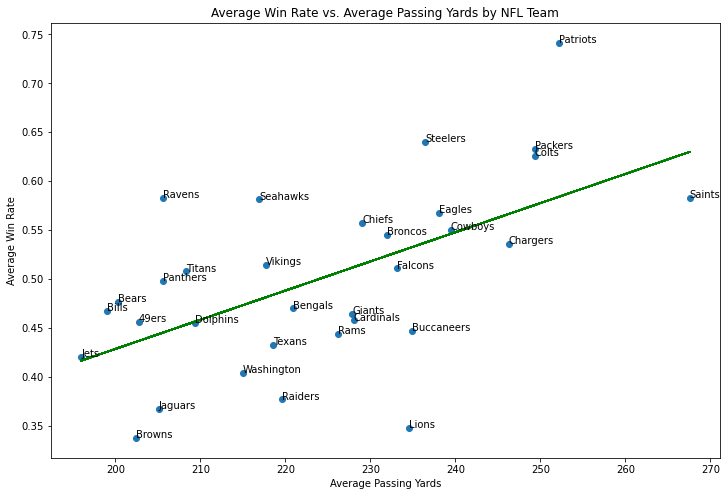

In [14]:
# instantiate the plot
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['passing_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
avg_passing_yards = list(team_df['passing_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (avg_passing_yards[index], avg_win_rate[index]))
    x = np.array(avg_passing_yards)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

# add labeling
plt.xlabel("Average Passing Yards")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Average Passing Yards by NFL Team')

## 3.1.5 Rushing Yards Relationship with Win Rate

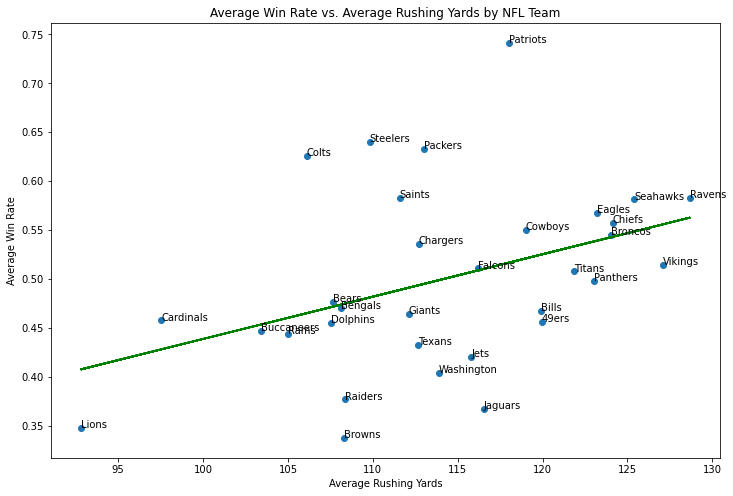

In [15]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['rushing_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
avg_rushing_yards = list(team_df['rushing_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (avg_rushing_yards[index], avg_win_rate[index]))
    x = np.array(avg_rushing_yards)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Average Rushing Yards")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Average Rushing Yards by NFL Team')
plt.show()

From the graphs above it seems that more passing and more rushing yards individaully result in an increase average win rate. Although, it appears that the the slope for passing yards is steeper which indicates a stronger relation between passing yards and win rate. Let's lastly create a bar graph to directly compare passing and rushing yards for winning and losing teams.

## 3.1.6. Comparison Between Rushing and Passing Yards 

In [16]:
# create a list for the winning and losing team values
winning_values = []
losing_values = []


# create variable to stroe the yardage total for passing and rushing by winning and losing teams
win_pass_total = 0
win_run_total = 0
lose_pass_total = 0
lose_run_total = 0


# iterate through the dataframe and add to corresponding total 
for index, row in game_df.iterrows():
    if row.Winner == 'Home':
        win_pass_total += row.passing_yards_home
        win_run_total += row.rushing_yards_home
        lose_pass_total += row.passing_yards_away
        lose_run_total += row.rushing_yards_away
    else:
        win_pass_total += row.passing_yards_away
        win_run_total += row.rushing_yards_away
        lose_pass_total += row.passing_yards_home
        lose_run_total += row.rushing_yards_home
        
# get the average for winning teams passing and rushing yardage
winning_values.append(win_pass_total / len(game_df))
winning_values.append(win_run_total / len(game_df))

# get the average for losing teams passing and rushing average
losing_values.append(lose_pass_total / len(game_df))
losing_values.append(lose_run_total / len(game_df))


# set up the plot index
index = ['Winners', 'Losers']


# create the bar plot
df = pd.DataFrame({'Avg Passing Yards': winning_values,
                    'Avg Rushing Yards': losing_values}, index=index)

ax = df.plot.bar(rot=0, color={"Avg Passing Yards": "black", "Avg Rushing Yards": "purple"}, ylabel = 'Yards', title = 'Average' + 
                 ' Passing Yards vs. Rushing Yards for Winning and Losing Teams', figsize = (8,6))

From here it's evident that although teams have more passing yards whether they win or lose, the gap between passing and rushing yards for losing teams is significantly greater. A possible reason for this is that when teams are playing from behind, they will be forced to pass more since they need to move the ball down the field quicker to score which would result in less rushing and more passing. Last, let's compare passing and rushing for individual games. We can do this by plotting the result column (which is the home score - away score) and compare to the difference between the home team's passing scores and rushing scores respectively. We will also sepearate the plots into periods of 5 years so we can see if there's any fluctuation over the years (and it also it reduces the amount of points on a singular plot so it will be less cluttered). 

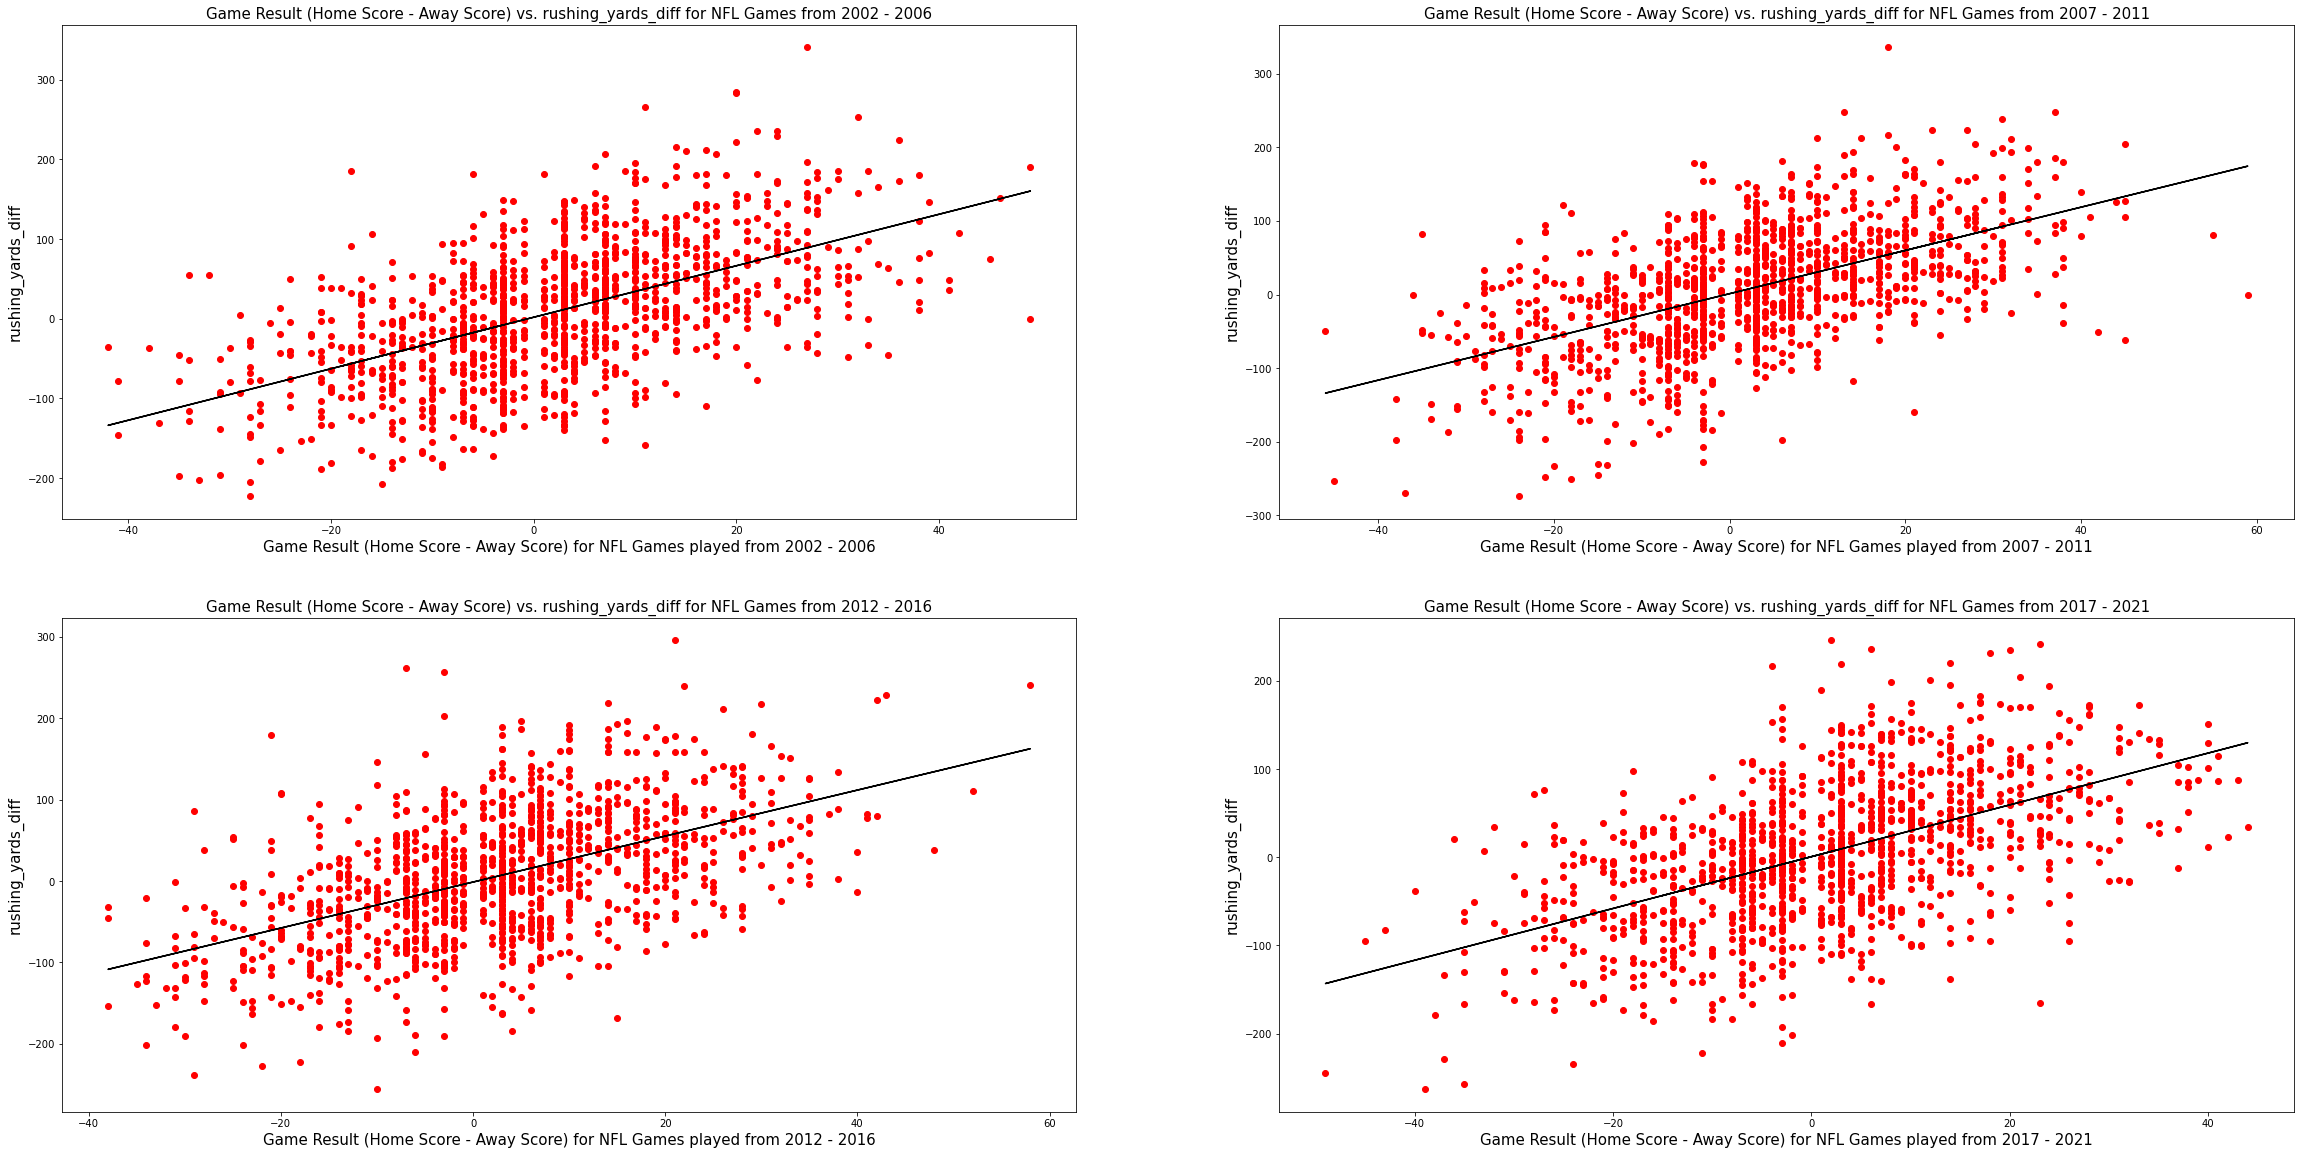

In [17]:
"""define a function splitPeriodPlot which will be used to create matplotlib subplots where each subplot corresponds to a period of time of 5 NFL seasons. Parameters are new_col_name
   which will be the new column added into the data frame, home_stat which is the game statistic for the home team, the away_stat is the same game corresponding statistic but for the away team, 
   plot_color which is the color used for the scatter plots, and regression_color which will specify the color of the regression line"""
def splitPeriodPlot(new_col_name, home_stat, away_stat, plot_color, regression_color):
    # create new subplot with 2 rows and 2 columns
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 20))  

    # create a new column to find the difference between the home team's passing yards 
    game_df[new_col_name] = game_df[home_stat] - game_df[away_stat]
    # create separate dataframes for the different time periods
    p1_df = game_df[game_df['season'].isin([2002, 2003, 2004, 2005, 2006])]
    p2_df = game_df[game_df['season'].isin([2007, 2008, 2009, 2010, 2011])]
    p3_df = game_df[game_df['season'].isin([2012, 2013, 2014, 2015, 2016])]
    p4_df = game_df[game_df['season'].isin([2017, 2018, 2019, 2020, 2021])]

    # create the scatter plot for each of the individual subplots. Also adds the labeling for the axes as well as the plot title
    axes[0,0].scatter(p1_df['result'], p1_df[new_col_name], c = plot_color)
    axes[0,0].set_title('Game Result (Home Score - Away Score)' + ' vs. ' + new_col_name +  ' for NFL Games from 2002 - 2006', fontsize = 15)
    axes[0,0].set_xlabel('Game Result (Home Score - Away Score) for NFL Games played from 2002 - 2006', fontsize = 15)
    axes[0,0].set_ylabel(new_col_name, fontsize = 15)
    axes[0,1].scatter(p2_df['result'], p2_df[new_col_name], c = plot_color)
    axes[0,1].set_title('Game Result (Home Score - Away Score)' + ' vs. ' + new_col_name +  ' for NFL Games from 2007 - 2011', fontsize = 15)
    axes[0,1].set_xlabel('Game Result (Home Score - Away Score) for NFL Games played from 2007 - 2011', fontsize = 15)
    axes[0,1].set_ylabel(new_col_name, fontsize = 15)
    axes[1,0].scatter(p3_df['result'], p3_df[new_col_name], c = plot_color)
    axes[1,0].set_title('Game Result (Home Score - Away Score)' + ' vs. ' + new_col_name +  ' for NFL Games from 2012 - 2016', fontsize = 15)
    axes[1,0].set_xlabel('Game Result (Home Score - Away Score) for NFL Games played from 2012 - 2016', fontsize = 15)
    axes[1,0].set_ylabel(new_col_name, fontsize = 15)
    axes[1,1].scatter(p4_df['result'], p4_df[new_col_name], c = plot_color)
    axes[1,1].set_title('Game Result (Home Score - Away Score)' + ' vs. ' + new_col_name +  ' for NFL Games from 2017 - 2021', fontsize = 15)
    axes[1,1].set_xlabel('Game Result (Home Score - Away Score) for NFL Games played from 2017 - 2021', fontsize = 15)
    axes[1,1].set_ylabel(new_col_name, fontsize = 15)

    # create the regression line for the first subplot
    x = np.array(p1_df['result'])
    y = np.array(p1_df[new_col_name])

    m, b = np.polyfit(x, y, 1)
    axes[0,0].plot(x, m*x + b, color = regression_color)

    # create the regression line for the second subplot
    x = np.array(p2_df['result'])
    y = np.array(p2_df[new_col_name])

    m, b = np.polyfit(x, y, 1)
    axes[0,1].plot(x, m*x + b, color = regression_color)

    # create the regression line for the third subplot
    x = np.array(p3_df['result'])
    y = np.array(p3_df[new_col_name])

    m, b = np.polyfit(x, y, 1)
    axes[1,0].plot(x, m*x + b, color = regression_color)

    # create the regression line for the fourth subplot
    x = np.array(p4_df['result'])
    y = np.array(p4_df[new_col_name])

    m, b = np.polyfit(x, y, 1)
    axes[1,1].plot(x, m*x + b, color = regression_color)

# call splitPeriodPlot to create the subplots for passing yards and rushing yards
splitPeriodPlot('passing_yards_diff', 'passing_yards_home', 'passing_yards_away', 'blue', 'black')
splitPeriodPlot('rushing_yards_diff', 'rushing_yards_home', 'rushing_yards_away', 'red', 'black')

From the plots above, it's clear that for all graphs the more passing or rushing yards means a more positive scoring differential (the home team which would be the winner is scoring more when having more rushing or passing yards compared to the losing team). Although, I do think there's something very interesting to note here for future reference. Although on our plots of rushing and passing yard averages for different teams passing yards seemed to have a more positive regression line, I would say on these scatter plots of individual games, rushing yards seems to have a stronger relationship to the winner of the game. For instance, looking at the period from 2002 - 2006, it's very clear that the plot for rushing yards has a steeper sloper for its regression line compared to passing yards which seems to imply that rushing yards may actually be a better indicator of the winner of a game. Before we move on, let's examine one more aspect of comparison between rushing and passing yards where we will plot rushing attempts vs the result (score difference) as well as completion attempts (this is for passing yards) vs the result and compare the regression lines.

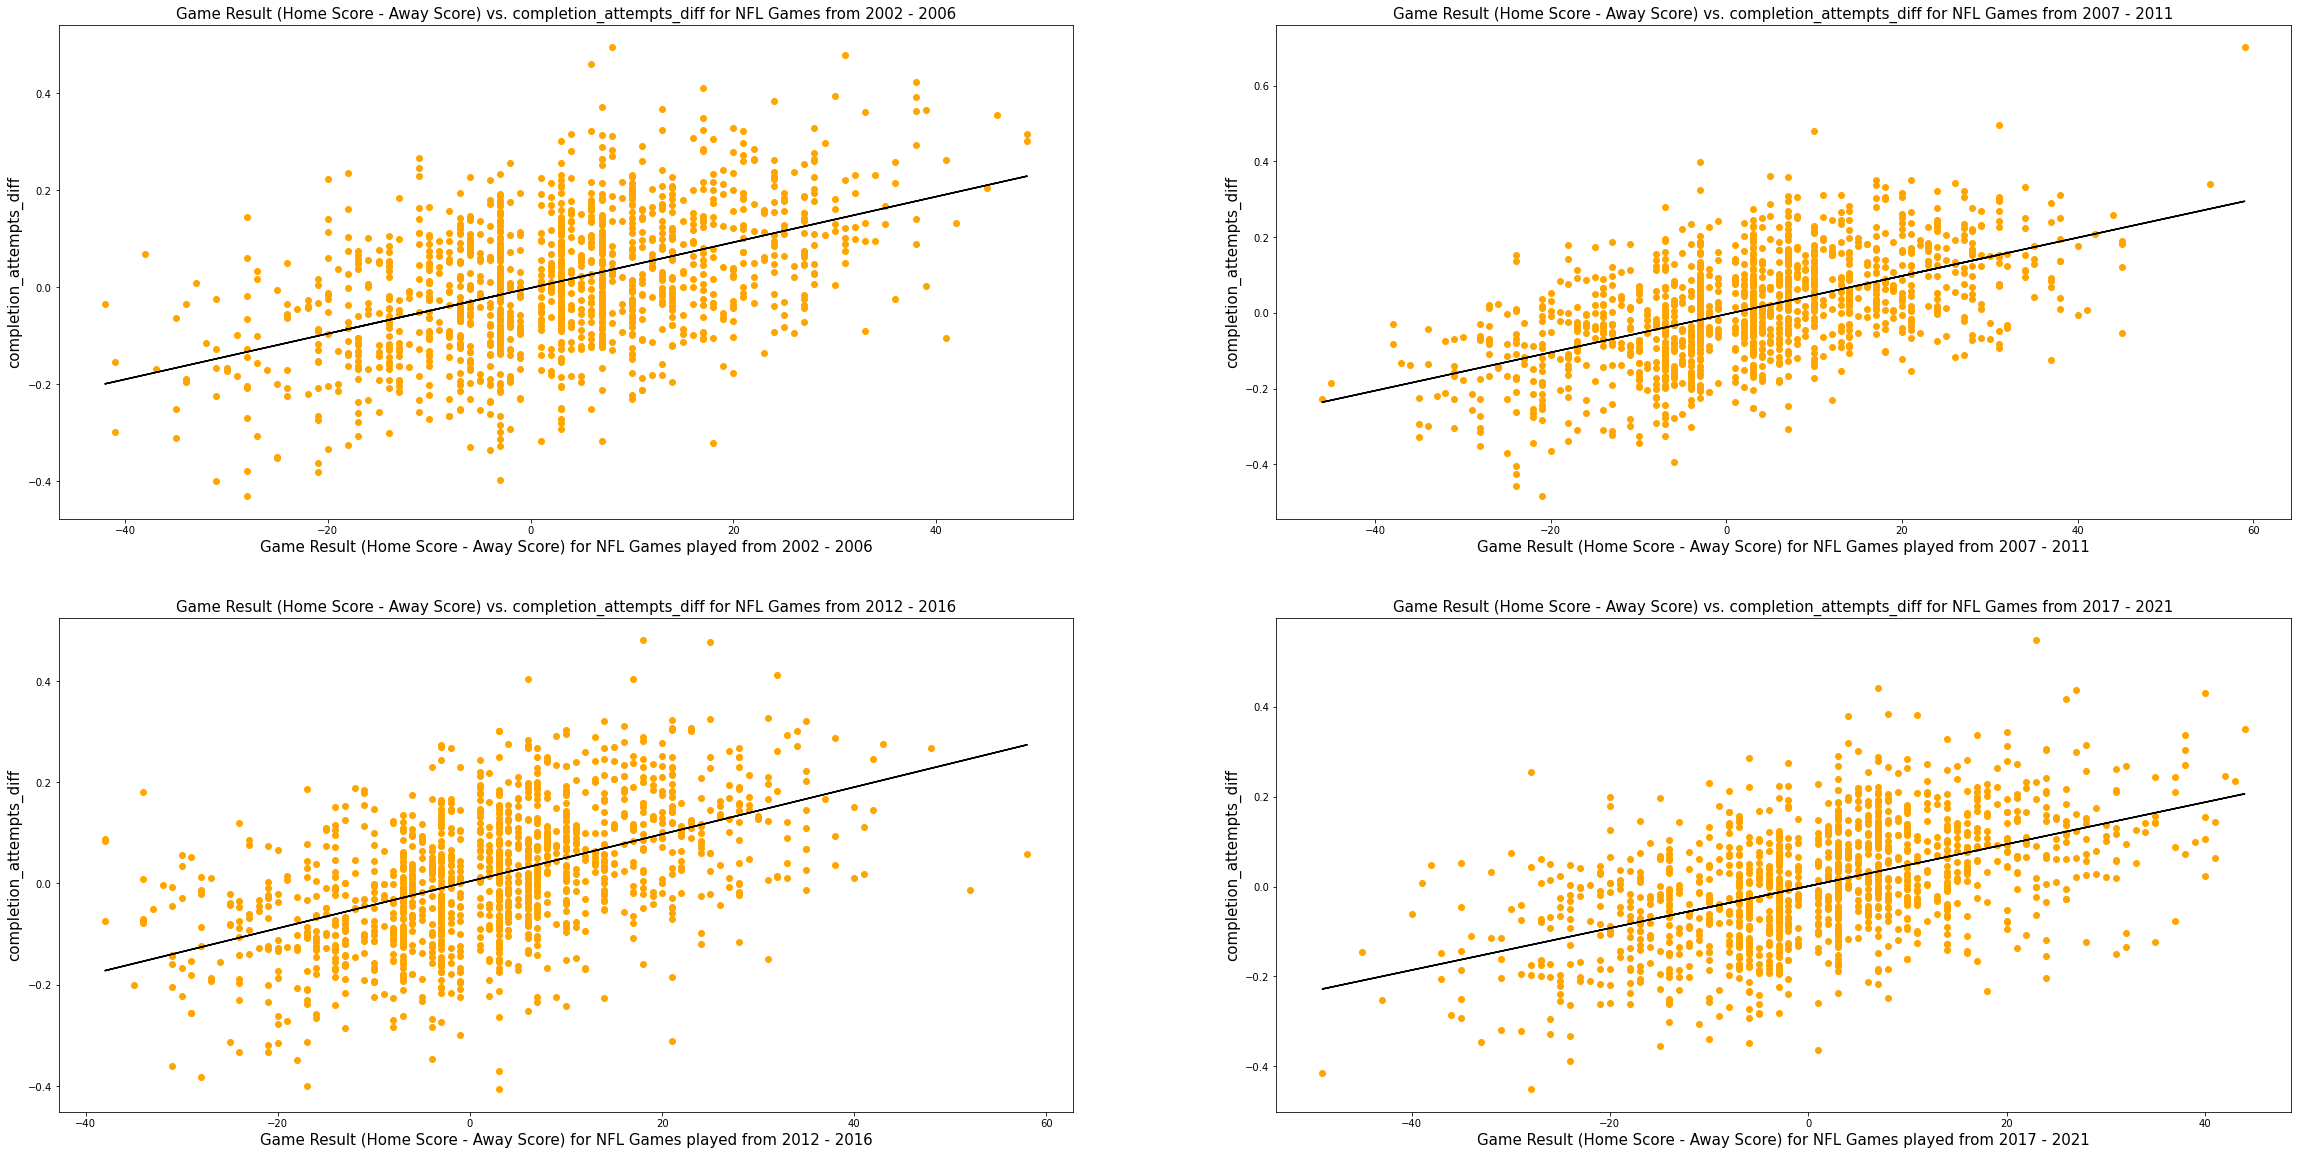

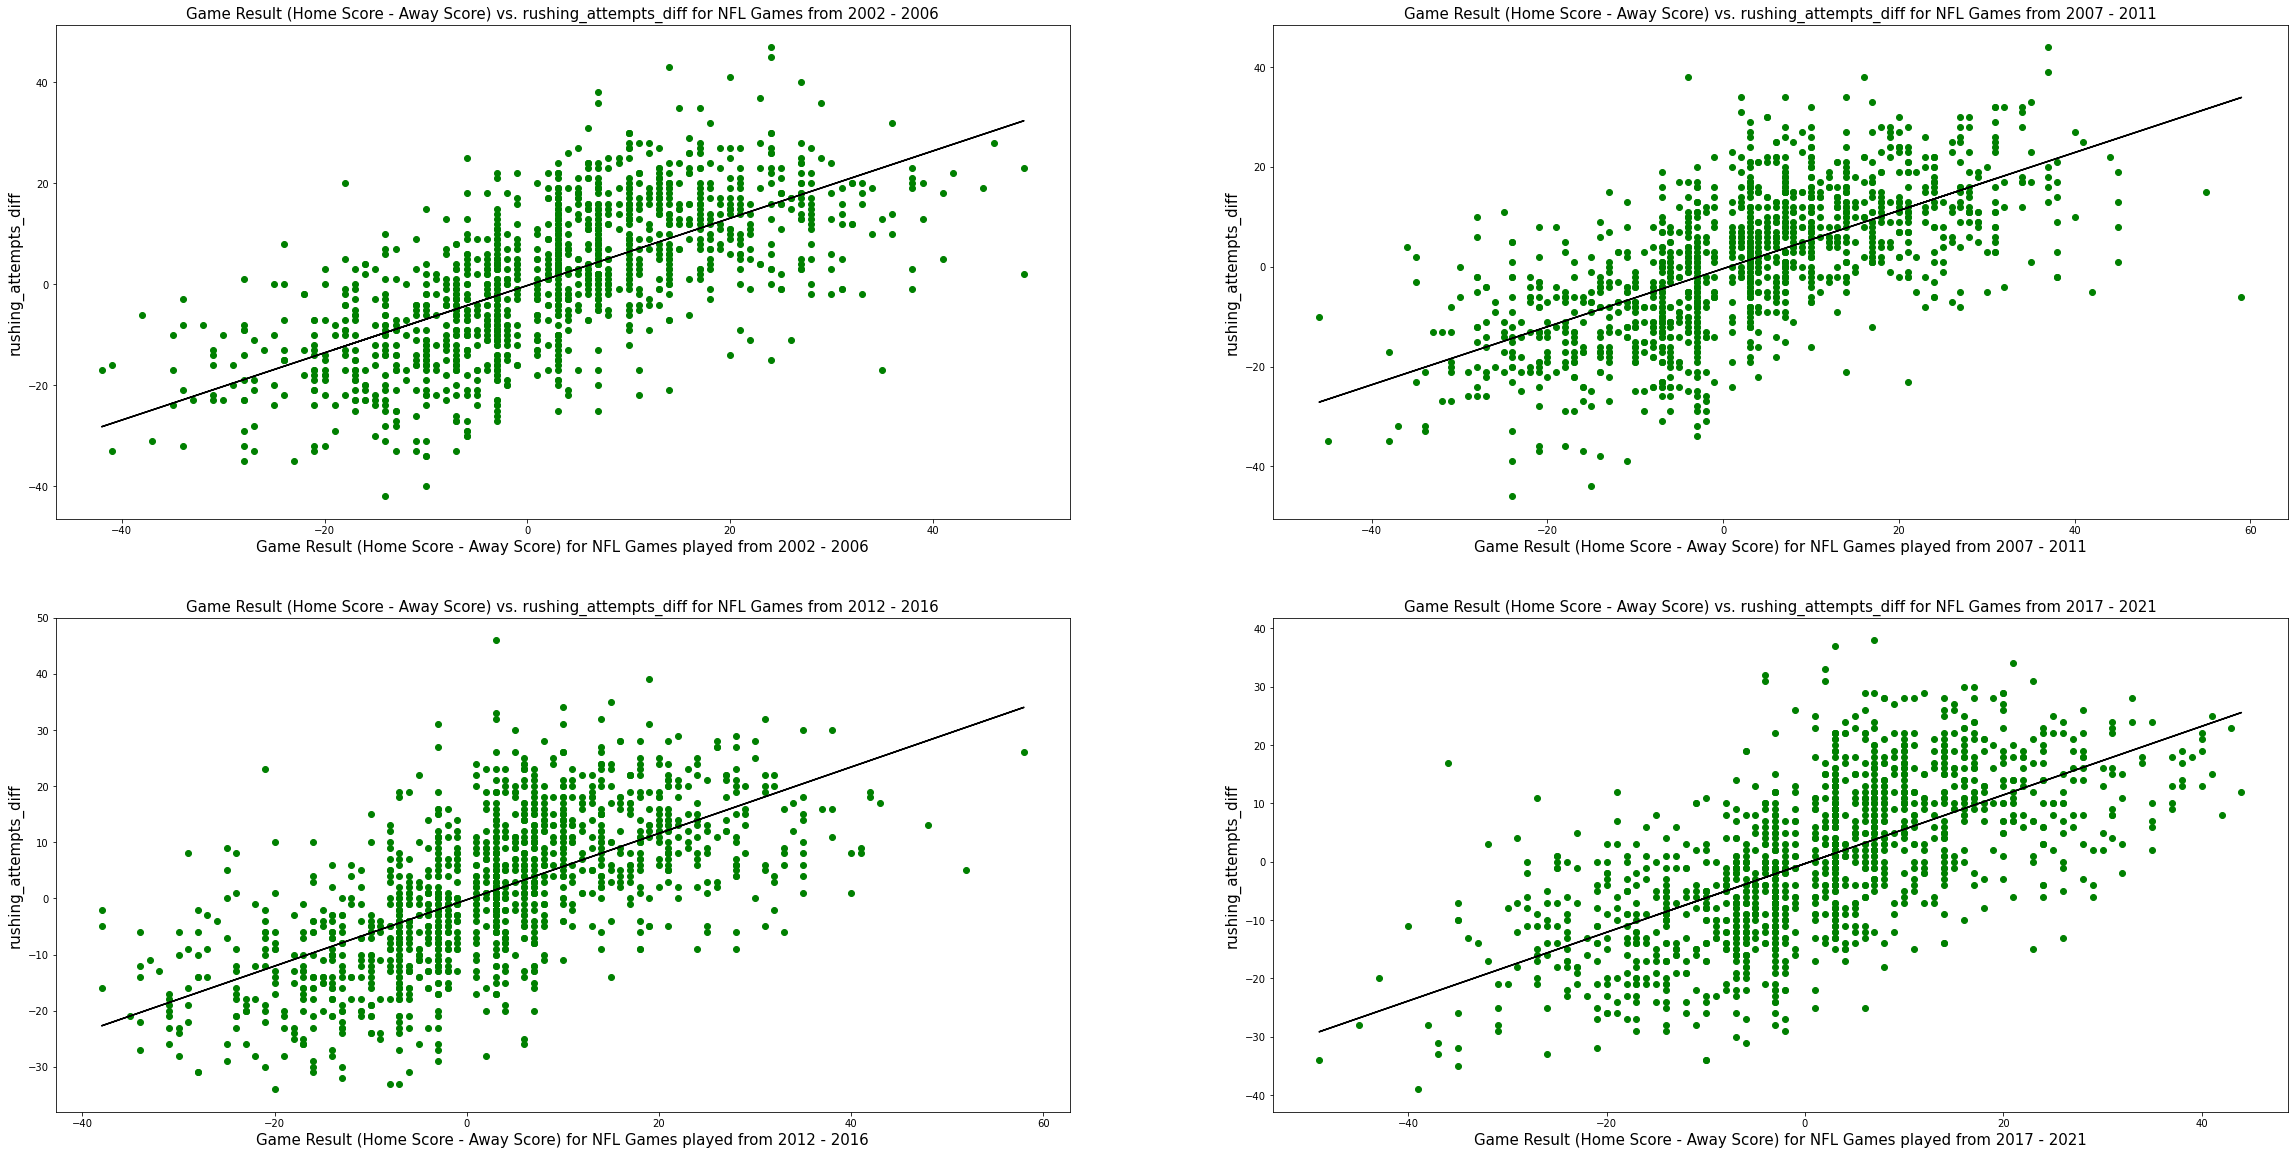

In [18]:
# call splitPeriodPlot function to create subplots for the completion attempt ratio and number of rushing attempts
splitPeriodPlot('completion_attempts_diff', 'comp_att_home_ratio', 'comp_att_away_ratio', 'orange', 'black')
splitPeriodPlot('rushing_attempts_diff', 'rushing_attempts_home', 'rushing_attempts_away', 'green', 'black')

Here I would say that from comparing the different graphs, it appears that rushing statistics may be a better indicator of the winner of an NFL game. For instance, it's most noticeable on the 2017-2021 plot where the slope of the regression line for the rushing attempts plot seems to be more steep than the completion percentage graph. Again, like the plots above that compared the difference in rushing yards and passing yards, the rushing plots seem to suggest a stronger relationship with the result of a game even though our intial plots of winning percentage for NFL teams compared to passing and rushing yards suggested the opposite where passing yards had a stronger relationship. This is certainly something interesting and an idea that we'll keep in mind when we need to build our model later down the line.

Now let's take a look at the effect of third down conversions on team winning percentage. For those not familiar with what this means, completing a third down essentially will allow a team's offense to continue moving the ball down the field with a new set of downs. If the third down is not converted a team can either try again on a 4th down (but give possession over if they fail) or the alternative which is typically to punt the ball to the other team.

## 3.1.7 Examining Third Down Conversion Rates Effect on Win Rate

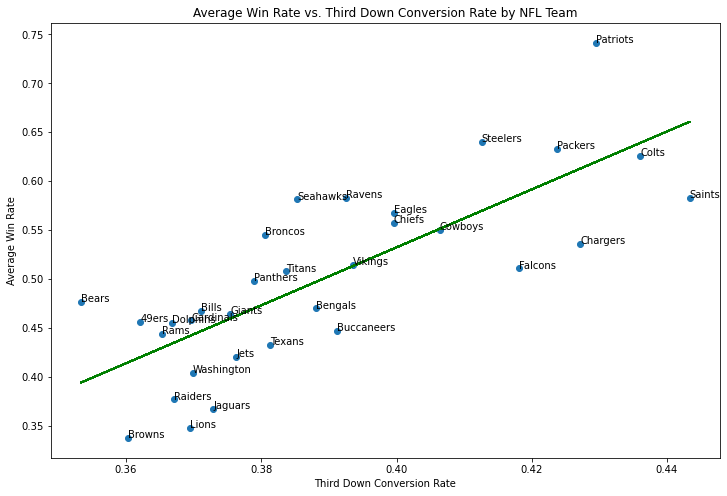

In [19]:
# create the plot
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['third_down_rate'], team_df['win_rate'])

# create list for labels
team_labels = list(team_df['teams'])
third_down_rate = list(team_df['third_down_rate'])
avg_win_rate = list(team_df['win_rate'])

# go through the teams and add labels
for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (third_down_rate[index], avg_win_rate[index]))
    x = np.array(third_down_rate)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

# labels the axes and the title of the plot
plt.xlabel("Third Down Conversion Rate")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Third Down Conversion Rate by NFL Team')
plt.show()

Now let's examine the impact of turnovers on games. First, let's make a grouped bar chart of the different types of turnovers (fumbles and interceptions) for winning teams and losing teams.

## 3.1.8 Analysis of Turnovers Impact on NFL Games

In [20]:
# create lists for the interceptions, fumbles, and turnovers
interception_values = []
fumble_values = []
turnover_values = []

# create total variables for the different features
win_interception_total = 0
win_fumble_total = 0
lose_interception_total = 0
lose_fumble_total = 0
win_turnover_total = 0
lose_turnover_total = 0

# iterate through the dataframe and add to the respective total vavriable based on if the winner of the game was the home team or the away team
for index, row in game_df.iterrows():
    if row.Winner == 'Home':
        win_interception_total += row.int_home
        win_fumble_total += row.fumbles_home
        lose_interception_total += row.int_away
        lose_fumble_total += row.fumbles_away
        win_turnover_total += row.turnovers_home
        lose_turnover_total += row.turnovers_away
    else:
        win_interception_total += row.int_away
        win_fumble_total += row.fumbles_away
        lose_interception_total += row.int_home
        lose_fumble_total += row.fumbles_home
        win_turnover_total += row.turnovers_away
        lose_turnover_total += row.turnovers_home

# calculate the average for each of the different features by dividing by the length of game_df (# of games played)
interception_values.append(win_interception_total / len(game_df))
interception_values.append(lose_interception_total/ len(game_df))
fumble_values.append(win_fumble_total / len(game_df))
fumble_values.append(lose_fumble_total / len(game_df))
turnover_values.append(win_turnover_total / len(game_df))
turnover_values.append(lose_turnover_total / len(game_df))

# create the index for the plot
index = ['Winning Teams', 'Losing Teams']

# plot the vertical bar graph
df = pd.DataFrame({'Avg Interceptions': interception_values, 'Avg Fumbles': fumble_values, 'Avg Turnovers': turnover_values }, index=index)

ax = df.plot.bar(rot=0, color={"Avg Interceptions": "green", "Avg Fumbles": "blue", 'Avg Turnovers': 'purple'}, ylabel = 'Count', title = 'Turnover' + 
                 ' Comparsion for Winning and Losing Teams', figsize = (8,6))

As we can see from the above bar plot, losing teams have more interceptions and fumbles compared to winning teams. The margin between interceptions and fumbles is also greater for losing teams than it is for winning teams. This may have something to do with losing teams being forced to pass the ball more when they are playing from behind which would lead to potentially more dangerous passes and thus a greater opportunity for the opposing defense to intercept the ball. Lastly, as we can see from the purple bar fur turnovers, the losing team has approximately double the number of turnovers as the winning team so it's clear that there appears to be a negative correlation between turnovers and winning where the more turnovers a team commits, the lower the win rate. Let's solidify this by making a scatter plot of turnovers vs. win rate. 

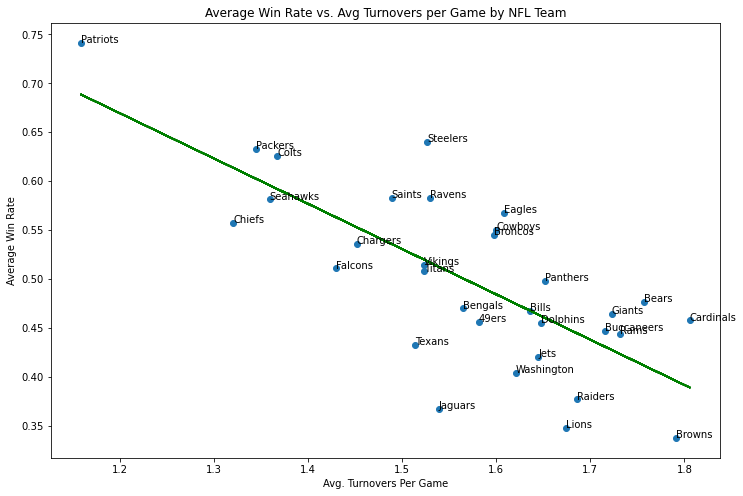

In [21]:
# instantiate the plot
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['turnover_avg'], team_df['win_rate'])

# create team labels
team_labels = list(team_df['teams'])
turnover_avg = list(team_df['turnover_avg'])
avg_win_rate = list(team_df['win_rate'])

# label the points
for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (turnover_avg[index], avg_win_rate[index]))
    x = np.array(turnover_avg)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

# label the title and axes
plt.xlabel("Avg. Turnovers Per Game")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Avg Turnovers per Game by NFL Team')
plt.show()

As we can see from the scatter plot above, it confirms that there's a pretty strong inverse correlation between turnovers and win rate where as turnovesr increase, the win rate decreases. Recall, back to our intial plot of win rates by team, we can see here that some of the most successful teams like the Patriots have the lowest average turnover per game at around 1.2 and have nearly a 75% win rate. On the other hand, some of the worst teams we mentioned previosuly such as the Raiders, Lions, and the Browns have some of the highest turnover averages with the Browns at nearly 1.8 per game and a 35% winning percentage.

## 3.1.9 Is there Actually Such Thing As Home Field Advantage?

The next thing we will look at is if home field advantage is actually something that exists or is just a myth. We will also look at 2020 individually because that season was when the COVID-19 pandemic resulted in fans being unable to attend the majority of games. We can then compare to the average from other years to see if factors that are purported to impact games (e.g. fans for the home team that is an "advantage") actually impact the game's outcome. The photo below was taken during a regular season game and as you can see the stadium seats are empty. If you desire to read more about the 2020 season and the oddities of it you can click this link:

**https://www.nfl.com/news/sidelines/2020-in-review-inside-the-most-unique-season-in-nfl-history**



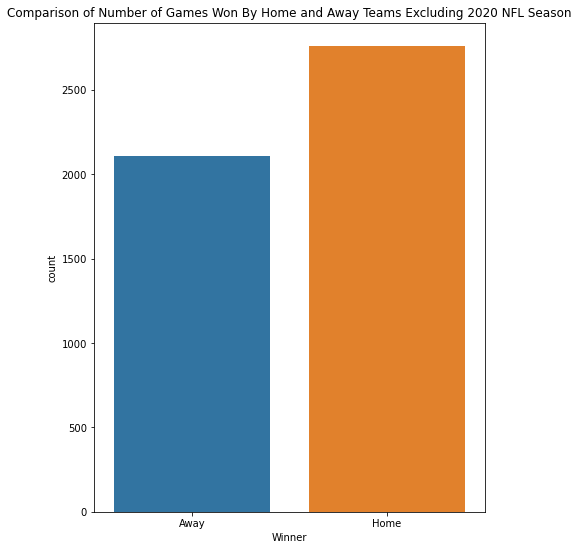

In [22]:
# create vertical bar plot for games won by home and away teams 
plt.figure(figsize = (7, 9))
plt.title('Comparison of Number of Games Won By Home and Away Teams Excluding 2020 NFL Season')
# pull data for all seaons excluding 2020
sns.countplot(x= 'Winner', data = game_df[game_df['season'] != 2020])
plt.show()

date      away     home  first_downs_away  first_downs_home  \
4803  2020-09-10    Texans   Chiefs                21                28   
4804  2020-09-13  Seahawks  Falcons                22                28   
4805  2020-09-13      Jets    Bills                15                31   
4806  2020-09-13     Bears    Lions                26                25   
4807  2020-09-13   Packers  Vikings                31                25   

     third_downs_away third_downs_home  passing_yards_away  \
4803             4-10             7-13                 242   
4804              3-9             7-14                 299   
4805             4-11             7-14                 202   
4806             2-11             6-16                 214   
4807             6-11              3-6                 364   

      passing_yards_home  rushing_yards_away  ...  third_down_ratio_away  \
4803                 203                 118  ...               0.400000   
4804                 434                  84  ...               0.333333   
4805                 306                  52  ...               0.363636   
4806                 288                 149  ...               0.181818   
4807                 248                 158  ...               0.545455   

      Winner  comp_att_away_ratio comp_att_home_ratio sacks_home_cnt  \
4803    Home             0.625000            0.750000            1.0   
4804    Away             0.885714            0.685185            2.0   
4805    Home             0.600000            0.717391            3.0   
4806    Away             0.555556            0.571429            1.0   
4807    Away             0.727273            0.760000            2.0   

     sacks_away_cnt passing_yards_diff  rushing_yards_diff  \
4803            4.0                -39                  48   
4804            3.0                135                 -12   
4805            3.0                104                  46   
4806            1.0                 74                 -11   
4807            0.0               -116                 -24   

      completion_attempts_diff  rushing_attempts_diff  
4803                  0.125000                     12  
4804                 -0.200529                      1  
4805                  0.117391                     17  
4806                  0.015873                      1  
4807                  0.032727                    -10  

[5 rows x 58 columns]

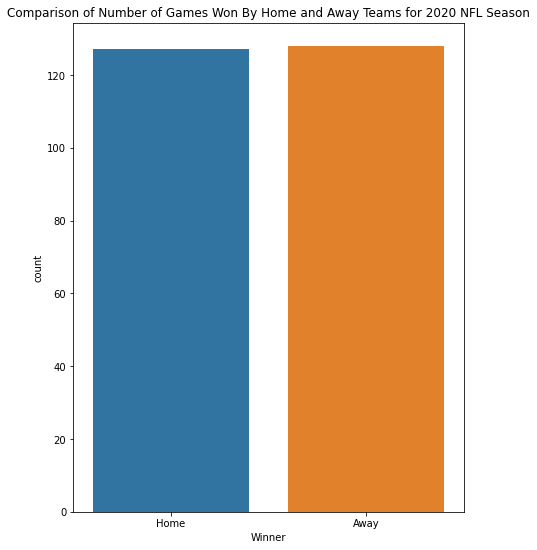

In [23]:
# select only rows which represent NFL games that were played during the 2020 nfl season
season_2020_df = game_df[game_df['season'] == 2020]
display(season_2020_df.head())

# create the bar plot
plt.figure(figsize = (7, 9))
plt.title('Comparison of Number of Games Won By Home and Away Teams for 2020 NFL Season')
sns.countplot(x= 'Winner', data = season_2020_df)
plt.show()

As we can see from the plots above, we have have some very interesting results. It appears that home field advantage is actually a thing because as for all other seasons excluding 2020, it appears in total home teams won about 500+ more games than away teams. However, in the 2020 season home and away teams actually had almost the exact same number of games won. From this it appears home field advantage isn't actually a myth and factors like crowd noise may actually have a significant impact on the winner of the game. I guess the "12s" as the Seattle Seahawks put it aren't ridiculous after all. :) **https://www.seahawks.com/fans/the-12s/**

## 3.2.1 Impact of Penalties on Games

First, let's just compare the number of penalties and penalty yards between winning and losing teams using some bar graphs. 

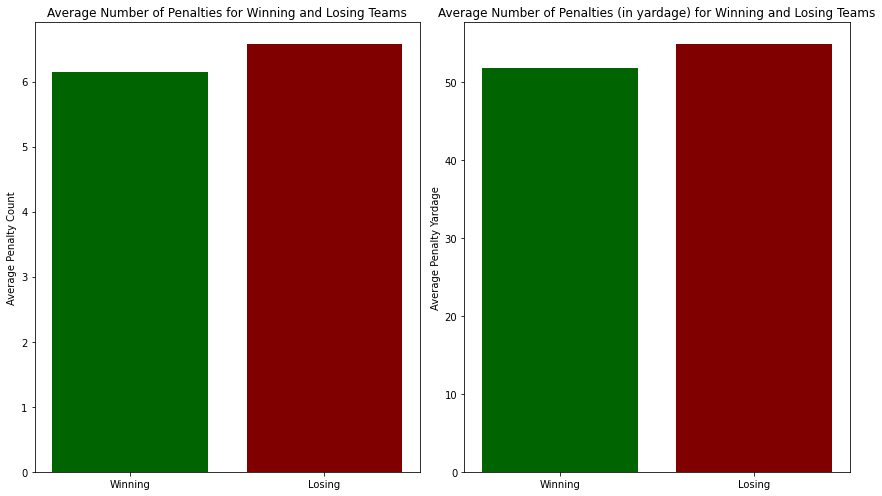

In [24]:
# create the list for penalties and penalty yardage for each winning and losing NFL teams
penalties_winning_teams = []
penalties_losing_teams = []
penalties_yards_winning_teams = []
penalties_yards_losing_teams = []

# iterate through the dataframe and add to respective total variables depending on the winning team
for index, row in game_df.iterrows():
    if row.Winner == 'Home':
        penalties_winning_teams.append(row.penalty_cnt_home)
        penalties_yards_winning_teams.append(row.penalty_yards_home)
        penalties_losing_teams.append(row.penalty_cnt_away)
        penalties_yards_losing_teams.append(row.penalty_yards_away)
    else:
        penalties_winning_teams.append(row.penalty_cnt_away)
        penalties_yards_winning_teams.append(row.penalty_yards_away)
        penalties_losing_teams.append(row.penalty_cnt_home)
        penalties_yards_losing_teams.append(row.penalty_yards_home)

# find the average penalty count and penalty yardage for teams that won
penalties_winning_teams_avg = sum(penalties_winning_teams) / len(penalties_winning_teams)
penalties_losing_teams_avg = sum(penalties_losing_teams) / len(penalties_losing_teams)

# find the average penalty count and penalty yardage for teams that lost
penalties_winning_teams_yards_avg = sum(penalties_yards_winning_teams) / len(penalties_yards_winning_teams)
penalties_losing_teams_yards_avg = sum(penalties_yards_losing_teams) / len(penalties_yards_losing_teams)

# instantiate the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

# create the first subplot for penalty counts by winning and losing teams
axes[0].title.set_text('Average Number of Penalties for Winning and Losing Teams')
axes[0].set(ylabel="Average Penalty Count")
labels = ['Winning', 'Losing']
values = [penalties_winning_teams_avg, penalties_losing_teams_avg]
axes[0].bar(labels, values, color = ['darkgreen', 'maroon'])

# create the second subplot for penalty yardage by winning and losing teams
axes[1].set(ylabel="Average Penalty Yardage")
axes[1].title.set_text('Average Number of Penalties (in yardage) for Winning and Losing Teams')
values = [penalties_winning_teams_yards_avg, penalties_losing_teams_yards_avg]
axes[1].bar(labels, values, color = ['darkgreen', 'maroon'])
fig.tight_layout()
plt.show()
    

From the above plots, we can see that there isn't a massive difference but there still exists a gap in the penalties and penalty yardages for winning and losing teams. For winning teams, the average number of penalties is around 6 while losing teams have around 6.5 penalties. For yardage, winning teams on average commit 51 yards in penalties while losing teams are slightly more around 53. This gap still isn't super massive so let's try and plot the average winning percentage vs. penalties for the different teams.

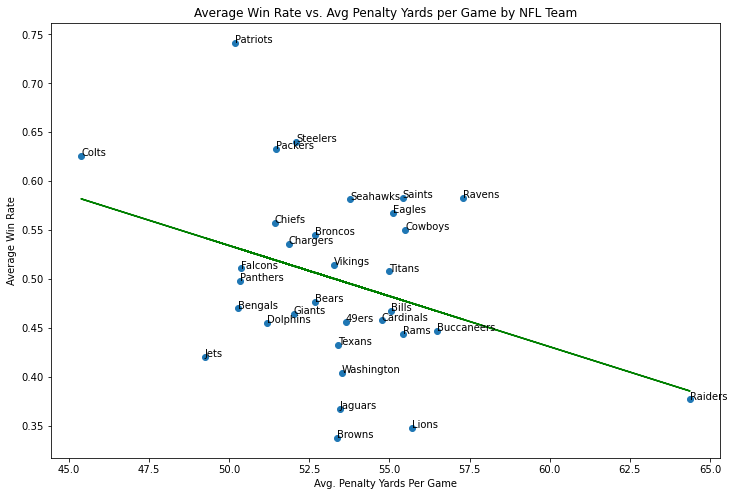

In [25]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['penalties_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
penalty_yards_avg = list(team_df['penalties_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (penalty_yards_avg[index], avg_win_rate[index]))
    x = np.array(penalty_yards_avg)
    y = np.array(avg_win_rate)
    
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Avg. Penalty Yards Per Game")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Avg Penalty Yards per Game by NFL Team')
plt.show()

From the graph we can see a negative correlation between penalty yards per game and the averge win rate for teams. It's interesting that the majority of teams actually have a similiar number of penalty yardage per game around 50 to 58 but about half of the teams are above the regression line and have a 50% or better winning percentage while about half of the other teams are below the regression line. The only obvious outliers outside of the cluster in the center is the raiders which are by far the most penalized team at nearly 65 yards per game and about a 40% winning rate and the Colts who have a very low penalty yardage per game at around 45 yards. Additionally, the Patriots are an outlier as they are on the lower average of penalty yards at around 51 but have nearly a 75% winning rate.

## 3.2.2 Time is Everything?

The next thing we will examine is the impact of time of possession on the win rate of different NFL teams and see what impact this has on the outcome of games.

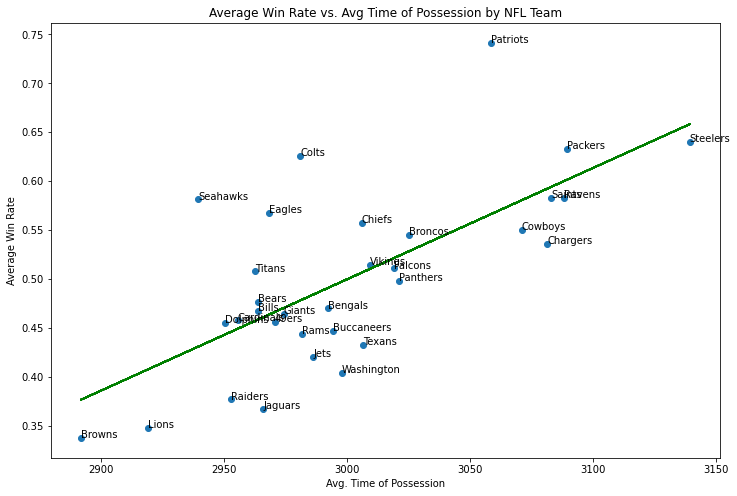

In [26]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['possession_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
possession_avg = list(team_df['possession_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (possession_avg[index], avg_win_rate[index]))
    x = np.array(possession_avg)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Avg. Time of Possession")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Avg Time of Possession by NFL Team')
plt.show()

Remember that the x-axis values are in minutes where 3050 represents 30:50 (30 minutes and 50 seconds). Overall, we can see that there's a relatively strong correlation from the regression line that as the time of possession increases the win rate for teams increases. At the same time, if we really examine the plot closely, the margin of time difference between teams at opposite ends of the plot are drastic in their win rate difference. For example, the Steelers, Ravens, Patriots, and Packers only have around 1 to 2 minutes more time of posession more compared to some of the teams that win the least like the Browns, Lions, and Raiders but the there's a nearly 30% win rate difference between them. 

## 3.2.3 Sack Masters

The next aspect we'll examine is the impact of sacks on games. Let's plot different team's winning percentage compared to the average number of sacks per game.

In [27]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['sack_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
sack_avg = list(team_df['sack_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (sack_avg[index], avg_win_rate[index]))
    x = np.array(sack_avg)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Avg. Sacks Taken")
plt.ylabel("Average Win Rate")
plt.title('Average Sacks Taken vs. Avg Win Rate by NFL Team')
plt.show()

From the above plot, we can see that as the number of sacks increases the average winning percentage decreases. The majority of teams take over 2 sacks per game and a few teams like the Patriots, Saints, and the Colts on average take less than 2 sacks. One thing I believe is pretty interesting from this plot is some of the winning teams like the Seahawks and Eagles take around the same number of sacks as some of the worst teams such as the Raiders, Lions, Jaguars, and Browns.

## 3.2.4 Driving to the Zone

Our final section in our exploratory analysis is to examine the effect of drives on games. We have columns for the number of drives and redzone drives so we'll take a look at both of them. If you're curious what redzone means, it's the area on the field between the 20 yard line and the end zone. Check out this Wikipedia page if you want to read a little bit more about it: 
**https://en.wikipedia.org/wiki/Red_zone_(gridiron_football)#:~:text=In%20gridiron%20football%2C%20the%20red,line%20and%20the%20goal%20line.**

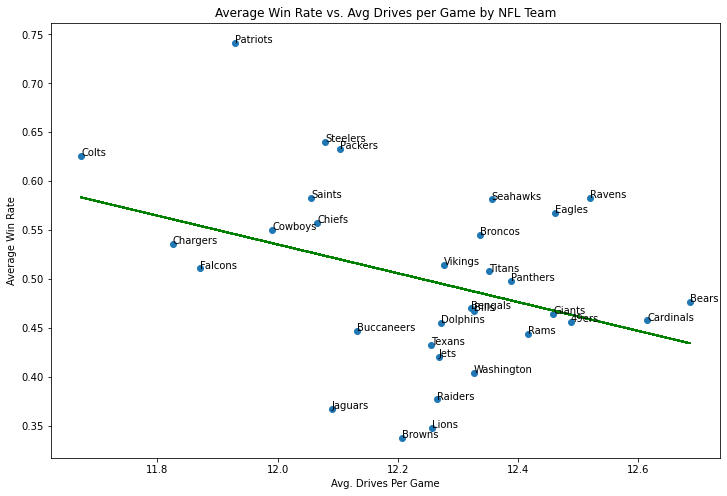

In [28]:
#display(team_df)

plt.figure(figsize = (12, 8))        
plt.scatter(team_df['drives_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
drives_avg = list(team_df['drives_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (drives_avg[index], avg_win_rate[index]))
    x = np.array(drives_avg)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Avg. Drives Per Game")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Avg Drives per Game by NFL Team')
plt.show()

From the above scatter plot, there's a negative correlation between drives per game the win rate for a team. This is pretty surprising as before plotting, I thought more drives would result in a higher win rate because it makes sense that the more chances you have the ball the better chance you have at winning the game. However, the plot above actually suggests the opposite as some of the most successful teams we've seen thus far like the Patriots and the Colts actually have lower average drives per game compared to the majority of other teams who are clustered around 12.2 and 12.5 drives per game. Let's now investigate the impact of red zone drives on the win rate for NFL teams.

In [29]:
# instantiate the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 12))        
axes[0].scatter(team_df['redzone_trips_avg'], team_df['win_rate'])
axes[1].scatter(team_df['redzone_ratio'], team_df['win_rate'])

# create list for labels
team_labels = list(team_df['teams'])
redzone_trips_avg = list(team_df['redzone_trips_avg'])
redzone_ratio = list(team_df['redzone_ratio'])
avg_win_rate = list(team_df['win_rate'])

# go through the labels and add team label for each point
for index, team_label in enumerate(team_labels):
    axes[0].annotate(team_label, (redzone_trips_avg[index], avg_win_rate[index]))
    axes[1].annotate(team_label, (redzone_ratio[index], avg_win_rate[index]))
    
# create the regression for the subplots
x = np.array(redzone_trips_avg)
y = np.array(avg_win_rate)
    
m, b = np.polyfit(x, y, 1)
axes[0].plot(x, m*x + b, color = 'g')

x = np.array(redzone_ratio)
m, b = np.polyfit(x, y, 1)
axes[1].plot(x, m*x + b, color = 'r')

# add title and axes labels for the different subplots
axes[0].set(xlabel = "Avg. Red Zone Drives Per Game")
axes[0].set(ylabel = "Avg. Win Rate")
axes[0].set(title = "Avg. Red Zones Drives Per Game vs. Avg. Win Rate for NFL Teams")
axes[1].set(xlabel = "Avg. Red Zone Scoring Ratio Per Game")
axes[1].set(ylabel = "Avg. Win Rate")
axes[1].set(title = "Avg. Red Zone Scoring Ratio vs. Avg. Win Rate for NFL Teams")
plt.show()

Here we see an opposite relationship compared to the number of drives per game. While drives per game had an inverse relationship with win rate, here red zone drives per game and red zone scoring ratio (number of times the team scored while in the red zone) have a positive relationship with average win rate. Although, I would say visually comparing the two red zone plots, the number of of red zone drives has a steeper slope compared to red zone scoring ratio which suggests it's a slightly better indicator of who wins a game compared to the red zone scoring ratio.   

# 3.2.5 Analysis Summary 

The next step in our data science pipeline will be developing our predictive model. However, before we continue on let's try to visually summarize the different aspects of NFL games we've gone in depth with during our exploratory data analsyis section. We can do this by creating a heat map which will show the correlations between the different aspects like third down rate compared to the win rate. From this map, we can quickly recap the information we've discovered in this section before we continue on to creating our model. To read the model, positive numbers indicate a postive correlation while negative numbers in the cell indicate an inverse relationship. For example, for red zone drives average we plotted above we saw a postive correlation and here we see a value of 0.85 for the cell for win_rate and redzone_trips_avg in the lower left hand corner of the plot.



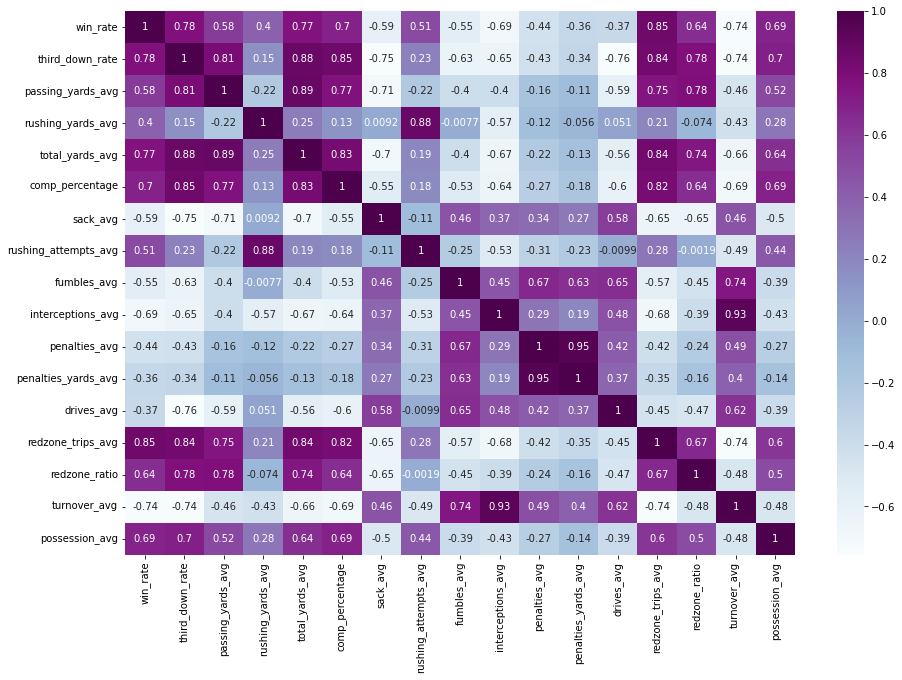

In [30]:
# create the plot instance
plt.figure(figsize=(15, 10))
# get the correlation matrix
corr = team_df.corr()
# plot the heatmap
sns.heatmap(corr,annot= True, cmap="BuPu")
plt.show()

## 4.1 Predictive Model/Hypothesis Testing

Now we will move onto the next stage of our data science pipeline which will be building a predictive model for who wins an NFL game. In order to do so we will first need to decide which predictors we want to use for our model. As we saw from our exploratory analysis there are a plethora of factors which impact the teams that win the most. In order to decide which factors we will keep we will first run a bunch of hypothesis tests on the different factors. Essentially, for each one of our game factors the null hypothesis will be it has no impact on the game and the alternative hypothesis will be that it does have a significant impact on the game. 
After we decide on our chosen factors we will then run a Machine Learning algorithm and train it to predict the outcome of games. In order to run the tests we will be using the statsmodel package which you read about the documentation here:
* **https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html**

In [31]:
# hypothesisTest function for us to run hypothesis test on each of the different game factors. The factor parameter is the feature we want to run regression on so we can get the p and r^2 value out
def hypothesisTest(factor):
    # create a list for the results
    results = []
    # run regression where y = win_rate and x = the game factor passed
    model2 = smf.ols('win_rate ~' + factor, data = team_df)
    # fit the regression model
    model2_ = model2.fit()
    # add the p value to the result list
    results.append(model2_.pvalues[1])
    # add the r^2 value to the result list
    results.append(model2_.rsquared)
    # return the result list
    return results

# create a new dataframe for the game factors and r^2 values
game_factors_df = pd.DataFrame()
# create a lsit of the different game factors or features we want to run regression on 
game_factors_lst = ['third_down_rate', 'passing_yards_avg', 'rushing_yards_avg', 'total_yards_avg', 'fumbles_avg', 'interceptions_avg', 'penalties_avg', 'penalties_yards_avg', 'drives_avg', 'redzone_trips_avg', 'redzone_ratio',
                    'turnover_avg', 'possession_avg', 'comp_percentage', 'sack_avg', 'rushing_attempts_avg', 'passing_yards_avg']
# create a separate list for the p values and the r^2 values
pvalues_lst = []
r2values_lst = []

# iterate through the different game factors and call hypothesisTest function
for factor in game_factors_lst:
    # get the results returned from helper function
    results = hypothesisTest(factor)
    # add the p value and r^2 value to corresponding list
    pvalues_lst.append(results[0])
    r2values_lst.append(results[1])
    
# create new dataframe for the different game factors and corresponding p values and r^2 values to be easier to read
game_factors_df['factors'] = game_factors_lst
game_factors_df['p-values'] = pvalues_lst
game_factors_df['r-2values'] = r2values_lst

# output the dataframe
display(game_factors_df)

factors      p-values  r-2values
0        third_down_rate  1.824997e-07   0.601902
1      passing_yards_avg  4.535306e-04   0.340692
2      rushing_yards_avg  2.313862e-02   0.160360
3        total_yards_avg  3.094967e-07   0.587926
4            fumbles_avg  9.839978e-04   0.307748
5      interceptions_avg  1.066285e-05   0.481362
6          penalties_avg  1.240700e-02   0.190898
7    penalties_yards_avg  4.543142e-02   0.126838
8             drives_avg  3.986710e-02   0.133351
9      redzone_trips_avg  7.089699e-10   0.723491
10         redzone_ratio  7.123144e-05   0.413958
11          turnover_avg  1.054007e-06   0.553655
12        possession_avg  1.444383e-05   0.471098
13       comp_percentage  8.994303e-06   0.487035
14              sack_avg  3.897814e-04   0.346977
15  rushing_attempts_avg  2.810103e-03   0.260982
16     passing_yards_avg  4.535306e-04   0.340692

From the above dataframe we've created, we can see that the p-values are all less than 0.05 so I would say they're all significant. Thus, in order to further narrow which factors we will actually keep, I'm electing to look at the r^2 values and choose the highest ones. Essentially, the higher the r^2 value, the better that factor is in fitting the model for win percentages for the different teams which allow us to pick the best predictors for games. Looking at the results, some of the lowest r^2 values include the rushing_yards_avg, penalties_avg, penalties_yards_avg, rushing_attempts_avg, and drives_avg. So let's drop these particular factors. 

In [32]:
game_factors_df = game_factors_df[game_factors_df.factors != 'rushing_yards_avg']
game_factors_df = game_factors_df[game_factors_df.factors != 'penalties_avg']
game_factors_df = game_factors_df[game_factors_df.factors != 'penalties_yards_avg']
game_factors_df = game_factors_df[game_factors_df.factors != 'drives_avg']
game_factors_df = game_factors_df[game_factors_df.factors != 'rushing_attempts_avg']

display(game_factors_df)

factors      p-values  r-2values
0     third_down_rate  1.824997e-07   0.601902
1   passing_yards_avg  4.535306e-04   0.340692
3     total_yards_avg  3.094967e-07   0.587926
4         fumbles_avg  9.839978e-04   0.307748
5   interceptions_avg  1.066285e-05   0.481362
9   redzone_trips_avg  7.089699e-10   0.723491
10      redzone_ratio  7.123144e-05   0.413958
11       turnover_avg  1.054007e-06   0.553655
12     possession_avg  1.444383e-05   0.471098
13    comp_percentage  8.994303e-06   0.487035
14           sack_avg  3.897814e-04   0.346977
16  passing_yards_avg  4.535306e-04   0.340692

Now that we've decided on our factors let's select them from the game_df dataframe (e.g. since third_down_rate is a factor we will keep the third_down_rate for each team in a game). Then, we will build our decision tree model using the decisiontreeclassifier from the scikit-learn library. If you're wondering why decision tree is the chosen model here it's because we have a binary classification problem because we're simply trying to predict if either the home team or the away team won and the decision tree is a model that's very suitable for tasks such as this. In our model, we will use hold out validation where 30% of the data will be used for the test set and 70% of the data will be used to train the model. Here our x will include all the different factors or features we will use to predict the winner of the game and our target is the winner of the game. 

## 4.1.1 Initial Model

In [33]:
# select our game factors
factors = ['passing_yards_away', 'passing_yards_home', 
       'total_yards_away', 'total_yards_home', 'fumbles_away', 'fumbles_home', 'int_away',
       'int_home', 'turnovers_away', 'turnovers_home', 'redzone_visits_home', 'redzone_ratio_home','redzone_visits_away', 'redzone_ratio_away',
        'third_down_ratio_home',
       'third_down_ratio_away', 'possession_away', 'possession_home', 'comp_att_away_ratio', 'comp_att_home_ratio', 'sacks_home_cnt', 'sacks_away_cnt']

# assign our target which is the column for the winner of the game
target = ['Winner']

# assign x and y for the model
x = game_df[factors]
y = game_df[target]

# create random split for the testing and training data with 30% of the data set used as the testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 1) 

# create decision tree instance
dt_classifier = DecisionTreeClassifier()

# fit the data
dt_classifier = dt_classifier.fit(X_train,y_train)

# get the predictions on the trained model
predictions = dt_classifier.predict(X_test)

# output the decision tree model's accuracy
print('Decision Tree Accuracy: ' + str(metrics.accuracy_score(y_test, predictions)))

Decision Tree Accuracy: 0.7586206896551724


From the accuracy score, we can see that the decision tree only was able to correctly predict the winner about 75 - 76% of the time. Let's try improving that by using a different model, the random forest. Essentially, the random forest is a more powerful version of the decision where we used multiple trees rather than a single tree to make classifications (in our case the winner of the game) which should make the model more accuracte and make it more resistant to overfitting. The only drawback is that under the hood, the random forest will be much more computationlly expensive since instead of creating a single decision tree we are creating multiple decision trees.

## 4.1.2 Using Random Forest

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.30, random_state= 1) 
# create random forest instance
rf_classifier = RandomForestClassifier()

# fit the data
rf_classifier = rf_classifier.fit(X_train2,y_train2.values.ravel())

# get the predictions on the trained model
predictions = rf_classifier.predict(X_test2)


# output the random forest model's accuracy
print('Random Forest Accuracy: ' + str(metrics.accuracy_score(y_test2, predictions)))

Random Forest Accuracy: 0.8445022771633052


From the accuracy score, we can see that the prediction percentage went up to around 84 - 85%! Obviously, we wish that the model could be in the 90% but the fact that we were able to get about a 10% increase in accuracy from switching from a decision tree to random forest model is a great improvement. Let's see if we can make any more improvements before we finish. Recall, that originally we've let out rushing as a feature for our model. However, from our exploratory analysis one of the things that was notable was that rushing stats actually appeared to be a better predictor than passing stats for the outcome of the game. So, let's add in a rushing stat and see if we can improve our model any more. 

## 4.1.3 Random Forest Additional Feature

In [35]:
# add in stat for rushing
factors.append('rushing_attempts_diff')
x = game_df[factors]
y = game_df[target]

X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.30, random_state= 1) 
# create random forest instance
rf_classifier = RandomForestClassifier()

# fit the data
rf_classifier = rf_classifier.fit(X_train2,y_train2.values.ravel())

# get the predictions on the trained model
predictions = rf_classifier.predict(X_test2)


# output the random forest model's accuracy with the additional feature for difference in rushing attempts
print('Random Forest Accuracy: ' + str(metrics.accuracy_score(y_test2, predictions)) + '\nPredictions\n-------------------------------------------------')

# grab first 200 rows (this is just to avoid outputing over 1000 lines of output)
output_df = game_df[0: 200]
#display(output_df)

# output the predictions
for index, row in output_df.iterrows():
    predicted_winner = ''
    
    # assign the predicted_winner based on if the home or away team won
    if predictions[index] == 'Home':
        predicted_winner = row.home
    else:
        predicted_winner = row.away
    
    # output the actual winner and predicted winner in a readable format
    if row.score_away > row.score_home:
        print('Actual Winner: ' + row.away + ' Predicted Winner: ' +  predicted_winner)
    else:
        print('Acutal Winner: ' + row.home + ' Predicted Winner: ' + predicted_winner)

Random Forest Accuracy: 0.8731294729993494
Predictions
-------------------------------------------------
Actual Winner: 49ers Predicted Winner: 49ers
Actual Winner: Jets Predicted Winner: Jets
Acutal Winner: Bears Predicted Winner: Vikings
Actual Winner: Chargers Predicted Winner: Bengals
Actual Winner: Chiefs Predicted Winner: Chiefs
Acutal Winner: Packers Predicted Winner: Packers
Acutal Winner: Titans Predicted Winner: Titans
Acutal Winner: Dolphins Predicted Winner: Dolphins
Acutal Winner: Washington Predicted Winner: Washington
Acutal Winner: Panthers Predicted Winner: Panthers
Actual Winner: Colts Predicted Winner: Colts
Acutal Winner: Broncos Predicted Winner: Broncos
Acutal Winner: Raiders Predicted Winner: Raiders
Actual Winner: Saints Predicted Winner: Saints
Acutal Winner: Texans Predicted Winner: Cowboys
Acutal Winner: Patriots Predicted Winner: Patriots
Actual Winner: Bears Predicted Winner: Falcons
Acutal Winner: Browns Predicted Winner: Browns
Acutal Winner: Cowboys Pred

Nice! It seems adding in the rushing stat was able to give our model another 2-3% increase in accuracy up to about 87 or 88 percent. Obviosuly, the model can't be perfect but I believe that our current model for predicting the outcome of games is pretty decent from where we started at with our decision tree which only had around 75% accuracy. Above, you can also see nice formatting for the actual winners and predicted winners of the model for the first 200 games in the data frame.

## 5.1 Communication of Insights

As stated in the beginning of this tutorial, the NFL is the most popular sport in America and as the years go on the intersection between the technology of data analytics and the NFL is continuing to grow and in evolve. To recap, in this tutorial we were able to cover a lot of ground where we first curated our selected data set. Then, we proceeded to do an exploratory analysis and found a lot of interesting relationships such as the most successful NFL teams, the impact of rushing and passing yards on games, third down conversion percentages, turnovers, the existence of home field advantage, and many more features. For instance, for rushing and passing yards we saw a positve correlation with win rate, a negative correlation with sacks and penalties, and drives, and a positive correlation with red zone drives. Next, we took some of the insights we gained from our exploratory analysis and selected the best features using hypothesis testing to try and build the best model. Finally, we built our intial predictive model for the winner of an NFl game using a decision tree and eventually moved on to using a more powerful model through a random forest to get up to nearly 88% predictive accuracy. I hope from this tutorial you've enjoyed learned and seen the value in how data plays an important role in sports such as football and that these predictive models could be used in many applications. For example, sports betting is something that is getting bigger and bigger: 
**https://fortune.com/2022/01/24/legalized-sports-betting-in-the-u-s-doubled-in-2021-heres-why-that-will-continue-after-the-greatest-weekend-in-nfl-playoff-history/**

and having a predictive model could help you make a decision on which teams to bet! While, in this tutorial we focused on building a model to predict winners of an NFL game I want to emphasize that this is only the beginning. As mentioned in the introduction AWS analytics is playing a big part in the NFL's foray into data but there's many other projects and opporunties you can embark on! For example, the data set that we used in this tutorial was found on Kaggle but there's many other datasets available on Kaggle and around the web where we could investigate many other aspects of the NFl such as the NFL draft, individual play by play, player salary data, and many more ideas! Additionally, the NFL also provides many other opportunities with data analytic challenges such as its Big Data Bowl which you can find as the following link:
**https://operations.nfl.com/gameday/analytics/big-data-bowl/**

Overall, I hope you've enjoyed reading and learning from this tutorial and see it as a stepping stone to continue exploring the world of data science and data analytics! 